In [37]:
from pathlib import Path
import json

refhuman_dir = Path("datasets") / "RefHuman"
candidates = [
    refhuman_dir / "val.json",
    *sorted(refhuman_dir.glob("*val*.json")),
]

val_json_path = next((p for p in candidates if p.exists()), None)
if val_json_path is None:
    raise FileNotFoundError(f"No val json found in: {refhuman_dir.resolve()}")

with val_json_path.open("r", encoding="utf-8") as f:
    val_data = json.load(f)

print(f"Loaded: {val_json_path} ({type(val_data).__name__})")

Loaded: datasets/RefHuman/RefHuman_val.json (dict)


In [38]:
val_data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [10]:
filenames = []
for img_info in val_data['images']:
    filenames.append(img_info['file_name'])
filenames_unique = set(filenames)

In [11]:
len(filenames), len(filenames_unique)

(165760, 19534)

In [13]:
filenames = []
for img_info in val_data['images']:
    filenames.append(img_info['file_name'])
filenames_unique = set(filenames)

In [14]:
len(filenames), len(filenames_unique)

(4257, 2100)

In [15]:
19534+2100

21634

In [1]:
import os
len(os.listdir("CrowdPose_HumarProcessed/images"))

20000

In [1]:
from pathlib import Path
import json

refhuman_dir = Path("CrowdPose_HumarProcessed")
candidates = [
    refhuman_dir / "val.json",
    *sorted(refhuman_dir.glob("*val*.json")),
]

val_json_path = next((p for p in candidates if p.exists()), None)
if val_json_path is None:
    raise FileNotFoundError(f"No val json found in: {refhuman_dir.resolve()}")

with val_json_path.open("r", encoding="utf-8") as f:
    val_data = json.load(f)

print(f"Loaded: {val_json_path} ({type(val_data).__name__})")

Loaded: CrowdPose_HumarProcessed/RefHuman_val.json (dict)


In [2]:
from pathlib import Path
import json

refhuman_dir = Path("CrowdPose_HumarProcessed")
candidates = [
    refhuman_dir / "train.json",
    *sorted(refhuman_dir.glob("*train*.json")),
]

val_json_path = next((p for p in candidates if p.exists()), None)
if val_json_path is None:
    raise FileNotFoundError(f"No val json found in: {refhuman_dir.resolve()}")

with val_json_path.open("r", encoding="utf-8") as f:
    train_data = json.load(f)

print(f"Loaded: {val_json_path} ({type(train_data).__name__})")

Loaded: CrowdPose_HumarProcessed/RefHuman_train.json (dict)


In [8]:
filenames = []
for img_info in val_data['images']:
    filenames.append(img_info['file_name'])
filenames_unique = set(filenames)
print(f"Total images: {len(filenames)}, Unique images: {len(filenames_unique)}")

Total images: 16000, Unique images: 16000


In [10]:
filenames = []
for img_info in val_data['images']:
    filenames.append(img_info['file_name'])
filenames_unique = set(filenames)
print(f"Total images: {len(filenames)}, Unique images: {len(filenames_unique)}")

Total images: 4000, Unique images: 4000


In [5]:
crowdpose_json_path = Path("/mnt/e3dbc9b9-6856-470d-84b1-ff55921cd906/Datasets/Nikhil/Person_Datasets/CrowdPose/_annotations_COCO_fixed.json")

if not crowdpose_json_path.exists():
    raise FileNotFoundError(f"JSON not found: {crowdpose_json_path}")

with crowdpose_json_path.open("r", encoding="utf-8") as fp:
    crowdpose_data = json.load(fp)

print(f"Loaded: {crowdpose_json_path} ({type(crowdpose_data).__name__})")
if isinstance(crowdpose_data, dict):
    print("Top-level keys:", list(crowdpose_data.keys()))

Loaded: /mnt/e3dbc9b9-6856-470d-84b1-ff55921cd906/Datasets/Nikhil/Person_Datasets/CrowdPose/_annotations_COCO_fixed.json (dict)
Top-level keys: ['images', 'annotations', 'categories']


In [6]:
data =crowdpose_data

In [43]:
data['annotations'][0].keys()

dict_keys(['id', 'image_id', 'category_id', 'bbox', 'segmentation', 'keypoints', 'num_keypoints', 'area', 'iscrowd', 'caption'])

In [16]:
train_image_ids = []
for i in train_data['images']:
    train_image_ids.append(i['file_name'].split('.')[0])

In [18]:
train_image_ids[0]

'113208'

In [ ]:
def fetch_image_data_by_id(image_id, data):
    for annotation in data['annotations']:
        if annotation['image_id'] == image_id:
            return annotation
    return None

In [ ]:
for i in train_data['images']:
    if i['id']==1:
        print(i)

{'file_name': '102631.jpg', 'height': 427, 'width': 640, 'original_id': '102631', 'id': 2, 'caption': 'Man talking on phone, leaning on wall.', 'dataset_name': 'crowdpose', 'generation_type': '1'}


In [30]:
crowdpose_json_path = Path('CrowdPose_HumarProcessed/RefHuman_val.json')

if not crowdpose_json_path.exists():
    raise FileNotFoundError(f"JSON not found: {crowdpose_json_path}")

with crowdpose_json_path.open("r", encoding="utf-8") as fp:
    crowdpose_data = json.load(fp)

print(f"Loaded: {crowdpose_json_path} ({type(crowdpose_data).__name__})")
if isinstance(crowdpose_data, dict):
    print("Top-level keys:", list(crowdpose_data.keys()))

Loaded: CrowdPose_HumarProcessed/RefHuman_val.json (dict)
Top-level keys: ['info', 'licenses', 'images', 'annotations', 'categories']


In [16]:
import json
from pathlib import Path

# Load all three JSON files from CrowdPose_HumarProcessed
folder = Path("CrowdPose_HumarProcessed")

# 1. _annotations_COCO_fixed.json
with open(folder / "_annotations_COCO_fixed.json", "r") as f:
    annotations_coco = json.load(f)

# 2. RefHuman_train.json
with open(folder / "RefHuman_train.json", "r") as f:
    refhuman_train = json.load(f)

# 3. RefHuman_val.json
with open(folder / "RefHuman_val.json", "r") as f:
    refhuman_val = json.load(f)

print("All 3 JSON files loaded successfully!")

All 3 JSON files loaded successfully!


In [2]:
# =====================================================
# ANALYSIS OF _annotations_COCO_fixed.json
# =====================================================
print("=" * 60)
print("1. _annotations_COCO_fixed.json")
print("=" * 60)

print(f"\nTop-level keys: {list(annotations_coco.keys())}")
print(f"Type: {type(annotations_coco)}")

for key in annotations_coco.keys():
    val = annotations_coco[key]
    if isinstance(val, list):
        print(f"\n'{key}': list with {len(val)} items")
        if len(val) > 0:
            print(f"  Sample item keys: {list(val[0].keys()) if isinstance(val[0], dict) else type(val[0])}")
            print(f"  First item sample: {val[0]}")
    elif isinstance(val, dict):
        print(f"\n'{key}': dict with {len(val)} keys")
        print(f"  Keys: {list(val.keys())[:10]}...")
    else:
        print(f"\n'{key}': {type(val).__name__} = {val}")

1. _annotations_COCO_fixed.json

Top-level keys: ['images', 'annotations', 'categories']
Type: <class 'dict'>

'images': list with 20000 items
  Sample item keys: ['id', 'file_name', 'width', 'height']
  First item sample: {'id': '109841', 'file_name': '109841.jpg', 'width': 748, 'height': 421}

'annotations': list with 150929 items
  Sample item keys: ['id', 'image_id', 'category_id', 'bbox', 'segmentation', 'keypoints', 'num_keypoints', 'area', 'iscrowd', 'caption']
  First item sample: {'id': 1, 'image_id': '109841', 'category_id': 1, 'bbox': [261.1089172363281, 61.5321159362793, 138.97030639648438, 205.9209747314453], 'segmentation': [[305.0, 63.0, 303.0, 65.0, 302.0, 65.0, 297.0, 70.0, 297.0, 71.0, 296.0, 72.0, 296.0, 73.0, 295.0, 74.0, 295.0, 76.0, 294.0, 77.0, 294.0, 79.0, 293.0, 80.0, 293.0, 84.0, 292.0, 85.0, 292.0, 88.0, 291.0, 89.0, 291.0, 94.0, 292.0, 95.0, 292.0, 96.0, 293.0, 97.0, 293.0, 101.0, 294.0, 102.0, 294.0, 105.0, 295.0, 106.0, 295.0, 113.0, 293.0, 115.0, 291.0, 1

In [17]:
# =====================================================
# ANALYSIS OF RefHuman_train.json
# =====================================================
print("=" * 60)
print("2. RefHuman_train.json")
print("=" * 60)

print(f"\nTop-level keys: {list(refhuman_train.keys())}")
print(f"Type: {type(refhuman_train)}")

for key in refhuman_train.keys():
    val = refhuman_train[key]
    if isinstance(val, list):
        print(f"\n'{key}': list with {len(val)} items")
        if len(val) > 0:
            print(f"  Sample item keys: {list(val[0].keys()) if isinstance(val[0], dict) else type(val[0])}")
            print(f"  First item sample: {val[0]}")
    elif isinstance(val, dict):
        print(f"\n'{key}': dict with {len(val)} keys")
        print(f"  Keys: {list(val.keys())[:10]}...")
    else:
        print(f"\n'{key}': {type(val).__name__} = {val}")

2. RefHuman_train.json

Top-level keys: ['info', 'licenses', 'images', 'annotations', 'categories']
Type: <class 'dict'>

'info': dict with 6 keys
  Keys: ['description', 'url', 'version', 'year', 'contributor', 'date_created']...

'licenses': list with 1 items
  Sample item keys: ['url', 'id', 'name']
  First item sample: {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 1, 'name': 'Attribution License'}

'images': list with 120501 items
  Sample item keys: ['file_name', 'height', 'width', 'original_id', 'id', 'caption', 'dataset_name', 'generation_type']
  First item sample: {'file_name': '109841.jpg', 'height': 421, 'width': 748, 'original_id': '109841', 'id': 1, 'caption': 'Man in suit holding coffee.', 'dataset_name': 'crowdpose', 'generation_type': '1'}

'annotations': list with 120501 items
  Sample item keys: ['id', 'image_id', 'category_id', 'bbox', 'area', 'iscrowd', 'segmentation', 'keypoints', 'num_keypoints', 'original_id', 'original_image_id', 'generation_type'

In [18]:
# =====================================================
# ANALYSIS OF RefHuman_val.json
# =====================================================
print("=" * 60)
print("3. RefHuman_val.json")
print("=" * 60)

print(f"\nTop-level keys: {list(refhuman_val.keys())}")
print(f"Type: {type(refhuman_val)}")

for key in refhuman_val.keys():
    val = refhuman_val[key]
    if isinstance(val, list):
        print(f"\n'{key}': list with {len(val)} items")
        if len(val) > 0:
            print(f"  Sample item keys: {list(val[0].keys()) if isinstance(val[0], dict) else type(val[0])}")
            print(f"  First item sample: {val[0]}")
    elif isinstance(val, dict):
        print(f"\n'{key}': dict with {len(val)} keys")
        print(f"  Keys: {list(val.keys())[:10]}...")
    else:
        print(f"\n'{key}': {type(val).__name__} = {val}")

3. RefHuman_val.json

Top-level keys: ['info', 'licenses', 'images', 'annotations', 'categories']
Type: <class 'dict'>

'info': dict with 6 keys
  Keys: ['description', 'url', 'version', 'year', 'contributor', 'date_created']...

'licenses': list with 1 items
  Sample item keys: ['url', 'id', 'name']
  First item sample: {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 1, 'name': 'Attribution License'}

'images': list with 30428 items
  Sample item keys: ['file_name', 'height', 'width', 'original_id', 'id', 'caption', 'dataset_name', 'generation_type']
  First item sample: {'file_name': '114811.jpg', 'height': 600, 'width': 900, 'original_id': '114811', 'id': 109, 'caption': '防守者阻挡持球进攻', 'dataset_name': 'crowdpose', 'generation_type': '1'}

'annotations': list with 30428 items
  Sample item keys: ['id', 'image_id', 'category_id', 'bbox', 'area', 'iscrowd', 'segmentation', 'keypoints', 'num_keypoints', 'original_id', 'original_image_id', 'generation_type', 'scribble']
  Firs

In [5]:
# =====================================================
# COMPREHENSIVE COMPARISON & INSIGHTS
# =====================================================
print("=" * 70)
print("COMPREHENSIVE SUMMARY OF ALL 3 JSON FILES")
print("=" * 70)

# Count statistics
print("\n📊 DATASET SIZES:")
print(f"{'File':<35} {'Images':<12} {'Annotations':<12} {'Categories'}")
print("-" * 70)
print(f"{'_annotations_COCO_fixed.json':<35} {len(annotations_coco['images']):<12} {len(annotations_coco['annotations']):<12} {len(annotations_coco['categories'])}")
print(f"{'RefHuman_train.json':<35} {len(refhuman_train['images']):<12} {len(refhuman_train['annotations']):<12} {len(refhuman_train['categories'])}")
print(f"{'RefHuman_val.json':<35} {len(refhuman_val['images']):<12} {len(refhuman_val['annotations']):<12} {len(refhuman_val['categories'])}")

# Check train + val = total
train_val_imgs = len(refhuman_train['images']) + len(refhuman_val['images'])
train_val_anns = len(refhuman_train['annotations']) + len(refhuman_val['annotations'])
print(f"\n{'Train + Val total:':<35} {train_val_imgs:<12} {train_val_anns:<12}")
print(f"{'Original COCO total:':<35} {len(annotations_coco['images']):<12} {len(annotations_coco['annotations']):<12}")

# Key structure differences
print("\n\n📋 STRUCTURE COMPARISON:")
print("-" * 70)
print("\n1. _annotations_COCO_fixed.json - ANNOTATION KEYS:")
print(f"   {list(annotations_coco['annotations'][0].keys())}")
print("\n2. RefHuman_train.json - ANNOTATION KEYS:")
print(f"   {list(refhuman_train['annotations'][0].keys())}")
print("\n3. RefHuman_val.json - ANNOTATION KEYS:")
print(f"   {list(refhuman_val['annotations'][0].keys())}")

# Image structure
print("\n\n1. _annotations_COCO_fixed.json - IMAGE KEYS:")
print(f"   {list(annotations_coco['images'][0].keys())}")
print("\n2. RefHuman_train.json - IMAGE KEYS:")
print(f"   {list(refhuman_train['images'][0].keys())}")
print("\n3. RefHuman_val.json - IMAGE KEYS:")
print(f"   {list(refhuman_val['images'][0].keys())}")

COMPREHENSIVE SUMMARY OF ALL 3 JSON FILES

📊 DATASET SIZES:
File                                Images       Annotations  Categories
----------------------------------------------------------------------
_annotations_COCO_fixed.json        20000        150929       1
RefHuman_train.json                 16000        120501       1
RefHuman_val.json                   4000         30428        1

Train + Val total:                  20000        150929      
Original COCO total:                20000        150929      


📋 STRUCTURE COMPARISON:
----------------------------------------------------------------------

1. _annotations_COCO_fixed.json - ANNOTATION KEYS:
   ['id', 'image_id', 'category_id', 'bbox', 'segmentation', 'keypoints', 'num_keypoints', 'area', 'iscrowd', 'caption']

2. RefHuman_train.json - ANNOTATION KEYS:
   ['id', 'image_id', 'category_id', 'bbox', 'area', 'iscrowd', 'segmentation', 'keypoints', 'num_keypoints', 'original_id', 'original_image_id', 'generation_type', '

In [6]:
# =====================================================
# KEY INSIGHTS & DIFFERENCES
# =====================================================
print("=" * 70)
print("🔍 KEY INSIGHTS & DIFFERENCES")
print("=" * 70)

# Check generation_type distribution
print("\n1️⃣ GENERATION_TYPE distribution (Train):")
gen_types_train = {}
for img in refhuman_train['images']:
    gt = img.get('generation_type', 'N/A')
    gen_types_train[gt] = gen_types_train.get(gt, 0) + 1
for k, v in sorted(gen_types_train.items()):
    print(f"   Type {k}: {v} images")

print("\n2️⃣ GENERATION_TYPE distribution (Val):")
gen_types_val = {}
for img in refhuman_val['images']:
    gt = img.get('generation_type', 'N/A')
    gen_types_val[gt] = gen_types_val.get(gt, 0) + 1
for k, v in sorted(gen_types_val.items()):
    print(f"   Type {k}: {v} images")

# ID type differences
print("\n3️⃣ ID TYPE DIFFERENCES:")
print(f"   _annotations_COCO_fixed.json image_id type: {type(annotations_coco['annotations'][0]['image_id'])}")
print(f"   RefHuman_train.json image_id type: {type(refhuman_train['annotations'][0]['image_id'])}")

# Check caption location
print("\n4️⃣ CAPTION LOCATION:")
print(f"   _annotations_COCO_fixed.json: Caption in ANNOTATIONS (per person)")
print(f"   RefHuman_train/val.json: Caption in IMAGES (per image)")

# Sample captions
print("\n5️⃣ SAMPLE CAPTIONS:")
print(f"   COCO annotation caption: '{annotations_coco['annotations'][0]['caption']}'")
print(f"   RefHuman image caption: '{refhuman_train['images'][0]['caption']}'")

# Check scribble field
scribbles_with_data = sum(1 for a in refhuman_train['annotations'] if a.get('scribble') and len(a['scribble']) > 0)
print(f"\n6️⃣ SCRIBBLE ANNOTATIONS (Train):")
print(f"   Annotations with scribble data: {scribbles_with_data} / {len(refhuman_train['annotations'])}")

# Sample scribble if exists
for ann in refhuman_train['annotations'][:100]:
    if ann.get('scribble') and len(ann['scribble']) > 0:
        print(f"   Sample scribble (first annotation with data): {ann['scribble'][:5]}...")
        break

🔍 KEY INSIGHTS & DIFFERENCES

1️⃣ GENERATION_TYPE distribution (Train):
   Type 1: 16000 images

2️⃣ GENERATION_TYPE distribution (Val):
   Type 1: 4000 images

3️⃣ ID TYPE DIFFERENCES:
   _annotations_COCO_fixed.json image_id type: <class 'str'>
   RefHuman_train.json image_id type: <class 'int'>

4️⃣ CAPTION LOCATION:
   _annotations_COCO_fixed.json: Caption in ANNOTATIONS (per person)
   RefHuman_train/val.json: Caption in IMAGES (per image)

5️⃣ SAMPLE CAPTIONS:
   COCO annotation caption: 'Man in suit holding coffee.'
   RefHuman image caption: 'Man running with urgency'

6️⃣ SCRIBBLE ANNOTATIONS (Train):
   Annotations with scribble data: 0 / 120501


In [7]:
# =====================================================
# CHECK KEYPOINT FORMAT & CATEGORY INFO
# =====================================================
print("=" * 70)
print("🦴 KEYPOINT & CATEGORY INFORMATION")
print("=" * 70)

# Categories comparison
print("\n1️⃣ CATEGORIES INFO:")
print(f"\n   _annotations_COCO_fixed.json:")
print(f"   {annotations_coco['categories'][0]}")
print(f"\n   RefHuman_train.json:")
print(f"   {refhuman_train['categories'][0]}")

# Keypoint count check
print("\n2️⃣ KEYPOINT COUNT:")
print(f"   COCO keypoints defined: {len(annotations_coco['categories'][0].get('keypoints', []))}")
print(f"   Sample annotation keypoints array length: {len(annotations_coco['annotations'][0]['keypoints'])}")
print(f"   num_keypoints (visible): {annotations_coco['annotations'][0]['num_keypoints']}")

# Verify data integrity - check if annotations reference valid images
print("\n3️⃣ DATA INTEGRITY CHECK:")
coco_img_ids = set(img['id'] for img in annotations_coco['images'])
train_img_ids = set(img['id'] for img in refhuman_train['images'])
val_img_ids = set(img['id'] for img in refhuman_val['images'])

print(f"   COCO unique image IDs: {len(coco_img_ids)}")
print(f"   Train unique image IDs: {len(train_img_ids)}")
print(f"   Val unique image IDs: {len(val_img_ids)}")
print(f"   Train-Val overlap: {len(train_img_ids & val_img_ids)} (should be 0)")

# Average annotations per image
print("\n4️⃣ ANNOTATIONS PER IMAGE (avg):")
print(f"   _annotations_COCO_fixed.json: {len(annotations_coco['annotations']) / len(annotations_coco['images']):.2f}")
print(f"   RefHuman_train.json: {len(refhuman_train['annotations']) / len(refhuman_train['images']):.2f}")
print(f"   RefHuman_val.json: {len(refhuman_val['annotations']) / len(refhuman_val['images']):.2f}")

🦴 KEYPOINT & CATEGORY INFORMATION

1️⃣ CATEGORIES INFO:

   _annotations_COCO_fixed.json:
   {'id': 1, 'name': 'person', 'supercategory': 'person', 'keypoints': ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle'], 'skeleton': [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]}

   RefHuman_train.json:
   {'supercategory': 'person', 'id': 1, 'name': 'person'}

2️⃣ KEYPOINT COUNT:
   COCO keypoints defined: 17
   Sample annotation keypoints array length: 51
   num_keypoints (visible): 13

3️⃣ DATA INTEGRITY CHECK:
   COCO unique image IDs: 20000
   Train unique image IDs: 16000
   Val unique image IDs: 4000
   Train-Val overlap: 0 (should be 0)

4️⃣ ANNOTATIONS PER IMAGE (avg):
   _annotations_CO

In [8]:
# =====================================================
# FIX RefHuman JSON FILES - RESTRUCTURE IMAGES LIST
# =====================================================
# Goal: Each annotation should have a corresponding image entry with same id
# The caption comes from the original _annotations_COCO_fixed.json

print("=" * 70)
print("STEP 1: Build lookup from original _annotations_COCO_fixed.json")
print("=" * 70)

# Build a lookup: original annotation id -> caption
# Also build: original image_id -> image info (file_name, width, height)
original_ann_to_caption = {}
original_img_info = {}

for ann in annotations_coco['annotations']:
    original_ann_to_caption[ann['id']] = ann.get('caption', '')

for img in annotations_coco['images']:
    original_img_info[img['id']] = {
        'file_name': img['file_name'],
        'width': img['width'],
        'height': img['height']
    }

print(f"✓ Built caption lookup for {len(original_ann_to_caption)} annotations")
print(f"✓ Built image info lookup for {len(original_img_info)} images")

# Sample check
sample_ann = annotations_coco['annotations'][0]
print(f"\nSample: annotation id={sample_ann['id']}, image_id={sample_ann['image_id']}")
print(f"  Caption: '{original_ann_to_caption[sample_ann['id']]}'")
print(f"  Image info: {original_img_info[sample_ann['image_id']]}")

STEP 1: Build lookup from original _annotations_COCO_fixed.json
✓ Built caption lookup for 150929 annotations
✓ Built image info lookup for 20000 images

Sample: annotation id=1, image_id=109841
  Caption: 'Man in suit holding coffee.'
  Image info: {'file_name': '109841.jpg', 'width': 748, 'height': 421}


In [9]:
# =====================================================
# STEP 2: Process RefHuman_train.json
# =====================================================
print("=" * 70)
print("STEP 2: Rebuild RefHuman_train.json images list")
print("=" * 70)

# For each annotation in train, we need to:
# 1. Get the original_id (which maps to original annotation id in _annotations_COCO_fixed.json)
# 2. Get the original_image_id (which maps to original image id)
# 3. Create an image entry with the same id as the annotation

new_train_images = []

for ann in refhuman_train['annotations']:
    # Get original IDs for lookup
    original_ann_id = ann['original_id']  # Maps to annotation id in _annotations_COCO_fixed.json
    original_img_id = ann['original_image_id']  # Maps to image id in _annotations_COCO_fixed.json
    
    # Get caption from original annotations
    caption = original_ann_to_caption.get(original_ann_id, '')
    
    # Get image info from original images
    img_info = original_img_info.get(original_img_id, {})
    
    # Create new image entry with same id as annotation
    new_img_entry = {
        'file_name': img_info.get('file_name', ''),
        'height': img_info.get('height', 0),
        'width': img_info.get('width', 0),
        'original_id': original_img_id,  # Original image id (same for all instances of same image)
        'id': ann['id'],  # Same as annotation id (unique for each instance)
        'caption': caption,  # Caption for THIS specific instance
        'dataset_name': 'crowdpose',
        'generation_type': '1'
    }
    
    new_train_images.append(new_img_entry)

print(f"✓ Created {len(new_train_images)} image entries (should be {len(refhuman_train['annotations'])})")
print(f"\nSample entries for verification:")
# Show a few samples
for i in range(min(3, len(new_train_images))):
    print(f"\nImage entry {i+1}:")
    print(f"  {new_train_images[i]}")

STEP 2: Rebuild RefHuman_train.json images list
✓ Created 120501 image entries (should be 120501)

Sample entries for verification:

Image entry 1:
  {'file_name': '109841.jpg', 'height': 421, 'width': 748, 'original_id': '109841', 'id': 1, 'caption': 'Man in suit holding coffee.', 'dataset_name': 'crowdpose', 'generation_type': '1'}

Image entry 2:
  {'file_name': '109841.jpg', 'height': 421, 'width': 748, 'original_id': '109841', 'id': 2, 'caption': 'Police officer talking to man.', 'dataset_name': 'crowdpose', 'generation_type': '1'}

Image entry 3:
  {'file_name': '109841.jpg', 'height': 421, 'width': 748, 'original_id': '109841', 'id': 3, 'caption': 'Man in blue shirt talking.', 'dataset_name': 'crowdpose', 'generation_type': '1'}


In [10]:
# =====================================================
# STEP 3: Process RefHuman_val.json
# =====================================================
print("=" * 70)
print("STEP 3: Rebuild RefHuman_val.json images list")
print("=" * 70)

new_val_images = []

for ann in refhuman_val['annotations']:
    # Get original IDs for lookup
    original_ann_id = ann['original_id']
    original_img_id = ann['original_image_id']
    
    # Get caption from original annotations
    caption = original_ann_to_caption.get(original_ann_id, '')
    
    # Get image info from original images
    img_info = original_img_info.get(original_img_id, {})
    
    # Create new image entry with same id as annotation
    new_img_entry = {
        'file_name': img_info.get('file_name', ''),
        'height': img_info.get('height', 0),
        'width': img_info.get('width', 0),
        'original_id': original_img_id,
        'id': ann['id'],
        'caption': caption,
        'dataset_name': 'crowdpose',
        'generation_type': '1'
    }
    
    new_val_images.append(new_img_entry)

print(f"✓ Created {len(new_val_images)} image entries (should be {len(refhuman_val['annotations'])})")
print(f"\nSample entries for verification:")
for i in range(min(3, len(new_val_images))):
    print(f"\nImage entry {i+1}:")
    print(f"  {new_val_images[i]}")

STEP 3: Rebuild RefHuman_val.json images list
✓ Created 30428 image entries (should be 30428)

Sample entries for verification:

Image entry 1:
  {'file_name': '114811.jpg', 'height': 600, 'width': 900, 'original_id': '114811', 'id': 109, 'caption': '防守者阻挡持球进攻', 'dataset_name': 'crowdpose', 'generation_type': '1'}

Image entry 2:
  {'file_name': '114811.jpg', 'height': 600, 'width': 900, 'original_id': '114811', 'id': 110, 'caption': 'Dribbling basketball on court.', 'dataset_name': 'crowdpose', 'generation_type': '1'}

Image entry 3:
  {'file_name': '114811.jpg', 'height': 600, 'width': 900, 'original_id': '114811', 'id': 111, 'caption': 'Player dribbling basketball during game.', 'dataset_name': 'crowdpose', 'generation_type': '1'}


In [11]:
# =====================================================
# STEP 4: Update annotations - set image_id = id (self-reference)
# =====================================================
print("=" * 70)
print("STEP 4: Update annotations to have image_id = id")
print("=" * 70)

# Since each image entry now has id = annotation id,
# the annotation's image_id should also be the same as its id

new_train_annotations = []
for ann in refhuman_train['annotations']:
    new_ann = ann.copy()
    new_ann['image_id'] = ann['id']  # image_id = annotation id (1:1 mapping)
    new_train_annotations.append(new_ann)

new_val_annotations = []
for ann in refhuman_val['annotations']:
    new_ann = ann.copy()
    new_ann['image_id'] = ann['id']  # image_id = annotation id (1:1 mapping)
    new_val_annotations.append(new_ann)

print(f"✓ Updated {len(new_train_annotations)} train annotations")
print(f"✓ Updated {len(new_val_annotations)} val annotations")

# Verify mapping
print("\n📋 VERIFICATION - Train (first 3 pairs):")
for i in range(min(3, len(new_train_images))):
    img = new_train_images[i]
    ann = new_train_annotations[i]
    print(f"  Image id={img['id']}, file={img['file_name']}, caption='{img['caption'][:40]}...'")
    print(f"  Annot id={ann['id']}, image_id={ann['image_id']}, original_image_id={ann['original_image_id']}")
    print()

STEP 4: Update annotations to have image_id = id
✓ Updated 120501 train annotations
✓ Updated 30428 val annotations

📋 VERIFICATION - Train (first 3 pairs):
  Image id=1, file=109841.jpg, caption='Man in suit holding coffee....'
  Annot id=1, image_id=1, original_image_id=109841

  Image id=2, file=109841.jpg, caption='Police officer talking to man....'
  Annot id=2, image_id=2, original_image_id=109841

  Image id=3, file=109841.jpg, caption='Man in blue shirt talking....'
  Annot id=3, image_id=3, original_image_id=109841



In [12]:
# =====================================================
# STEP 5: Create final JSON structures and SAVE
# =====================================================
print("=" * 70)
print("STEP 5: Save corrected RefHuman JSON files")
print("=" * 70)

import json
from pathlib import Path

# Create final train JSON
final_train = {
    'info': refhuman_train.get('info', {}),
    'licenses': refhuman_train.get('licenses', []),
    'images': new_train_images,
    'annotations': new_train_annotations,
    'categories': refhuman_train.get('categories', [])
}

# Create final val JSON
final_val = {
    'info': refhuman_val.get('info', {}),
    'licenses': refhuman_val.get('licenses', []),
    'images': new_val_images,
    'annotations': new_val_annotations,
    'categories': refhuman_val.get('categories', [])
}

# Save to files
output_folder = Path("CrowdPose_HumarProcessed")

train_output_path = output_folder / "RefHuman_train.json"
val_output_path = output_folder / "RefHuman_val.json"

print(f"Saving train to: {train_output_path}")
with open(train_output_path, 'w', encoding='utf-8') as f:
    json.dump(final_train, f, ensure_ascii=False)
print(f"✓ Saved RefHuman_train.json")

print(f"\nSaving val to: {val_output_path}")
with open(val_output_path, 'w', encoding='utf-8') as f:
    json.dump(final_val, f, ensure_ascii=False)
print(f"✓ Saved RefHuman_val.json")

print("\n" + "=" * 70)
print("FINAL VERIFICATION")
print("=" * 70)
print(f"\nRefHuman_train.json:")
print(f"  Images: {len(final_train['images'])}")
print(f"  Annotations: {len(final_train['annotations'])}")

print(f"\nRefHuman_val.json:")
print(f"  Images: {len(final_val['images'])}")
print(f"  Annotations: {len(final_val['annotations'])}")

STEP 5: Save corrected RefHuman JSON files
Saving train to: CrowdPose_HumarProcessed/RefHuman_train.json
✓ Saved RefHuman_train.json

Saving val to: CrowdPose_HumarProcessed/RefHuman_val.json
✓ Saved RefHuman_val.json

FINAL VERIFICATION

RefHuman_train.json:
  Images: 120501
  Annotations: 120501

RefHuman_val.json:
  Images: 30428
  Annotations: 30428


In [13]:
# =====================================================
# STEP 6: Reload and verify saved files
# =====================================================
print("=" * 70)
print("STEP 6: Reload and verify saved files")
print("=" * 70)

# Reload the saved files
with open("CrowdPose_HumarProcessed/RefHuman_train.json", 'r') as f:
    verified_train = json.load(f)

with open("CrowdPose_HumarProcessed/RefHuman_val.json", 'r') as f:
    verified_val = json.load(f)

print("\n📊 VERIFIED COUNTS:")
print(f"  Train - Images: {len(verified_train['images'])}, Annotations: {len(verified_train['annotations'])}")
print(f"  Val   - Images: {len(verified_val['images'])}, Annotations: {len(verified_val['annotations'])}")

# Show example of same image with multiple instances
print("\n📋 EXAMPLE: Multiple instances for same image (Train):")
# Find an image that appears multiple times
from collections import Counter
file_counts = Counter(img['file_name'] for img in verified_train['images'])
multi_instance_file = [f for f, c in file_counts.most_common(5)][0]

print(f"\nFile: {multi_instance_file}")
print("-" * 60)

# Get all image entries for this file
matching_images = [img for img in verified_train['images'] if img['file_name'] == multi_instance_file][:5]
for img in matching_images:
    print(f"  id={img['id']}, original_id={img['original_id']}")
    print(f"    caption: '{img['caption']}'")

# Get corresponding annotations
print("\nCorresponding annotations:")
matching_ann_ids = [img['id'] for img in matching_images]
for ann in verified_train['annotations']:
    if ann['id'] in matching_ann_ids:
        print(f"  id={ann['id']}, image_id={ann['image_id']}, bbox={ann['bbox'][:2]}...")

STEP 6: Reload and verify saved files

📊 VERIFIED COUNTS:
  Train - Images: 120501, Annotations: 120501
  Val   - Images: 30428, Annotations: 30428

📋 EXAMPLE: Multiple instances for same image (Train):

File: 100325.jpg
------------------------------------------------------------
  id=22841, original_id=100325
    caption: 'Boy sitting in front of group.'
  id=22842, original_id=100325
    caption: 'Boy sitting in front of group.'
  id=22843, original_id=100325
    caption: 'Boy sitting with legs crossed.'
  id=22844, original_id=100325
    caption: 'Boy sitting with hands on knees.'
  id=22845, original_id=100325
    caption: 'Boy sitting with legs crossed.'

Corresponding annotations:
  id=22841, image_id=22841, bbox=[276.3861389160156, 263.3165283203125]...
  id=22842, image_id=22842, bbox=[189.70504760742188, 271.8190002441406]...
  id=22843, image_id=22843, bbox=[114.2733383178711, 269.8821716308594]...
  id=22844, image_id=22844, bbox=[371.4039611816406, 274.3874816894531]...
  

In [19]:
# =====================================================
# INVESTIGATE CURRENT MAPPING - What should be the correct structure?
# =====================================================
print("=" * 70)
print("INVESTIGATING CURRENT DATA STRUCTURE")
print("=" * 70)

# Let's look at the ORIGINAL _annotations_COCO_fixed.json structure first
print("\n📋 ORIGINAL _annotations_COCO_fixed.json structure:")
print("\nSample image entry:")
print(f"  {annotations_coco['images'][0]}")
print("\nSample annotations for image_id='109841':")
for ann in annotations_coco['annotations'][:5]:
    if ann['image_id'] == '109841':
        print(f"  id={ann['id']}, image_id={ann['image_id']}, caption='{ann['caption'][:30]}...'")

print("\n" + "=" * 70)
print("DESIRED MAPPING (as per user request):")
print("=" * 70)
print("""
For image 111324.jpg with 3 instances:

images list:
  id=1  → original_id='111324' → caption for instance 1
  id=2  → original_id='111324' → caption for instance 2  
  id=3  → original_id='111324' → caption for instance 3

annotations list:
  id=1  → image_id=1 (maps to images.id=1)
  id=2  → image_id=2 (maps to images.id=2)
  id=3  → image_id=3 (maps to images.id=3)

So: images.id == annotations.id == annotations.image_id (1:1 mapping)
And: images.original_id = the actual image filename ID
""")

print("\n📋 CURRENT verified_train structure:")
print("\nSample image entries (first 3):")
for img in verified_train['images'][:3]:
    print(f"  id={img['id']}, original_id={img['original_id']}, file={img['file_name']}")

print("\nSample annotation entries (first 3):")
for ann in verified_train['annotations'][:3]:
    print(f"  id={ann['id']}, image_id={ann['image_id']}, original_image_id={ann['original_image_id']}")

INVESTIGATING CURRENT DATA STRUCTURE

📋 ORIGINAL _annotations_COCO_fixed.json structure:

Sample image entry:
  {'id': '109841', 'file_name': '109841.jpg', 'width': 748, 'height': 421}

Sample annotations for image_id='109841':
  id=1, image_id=109841, caption='Man in suit holding coffee....'
  id=2, image_id=109841, caption='Police officer talking to man....'
  id=3, image_id=109841, caption='Man in blue shirt talking....'
  id=4, image_id=109841, caption='Man in blue talking to police ...'
  id=5, image_id=109841, caption='Man in suit talking to officer...'

DESIRED MAPPING (as per user request):

For image 111324.jpg with 3 instances:

images list:
  id=1  → original_id='111324' → caption for instance 1
  id=2  → original_id='111324' → caption for instance 2  
  id=3  → original_id='111324' → caption for instance 3

annotations list:
  id=1  → image_id=1 (maps to images.id=1)
  id=2  → image_id=2 (maps to images.id=2)
  id=3  → image_id=3 (maps to images.id=3)

So: images.id == anno

In [20]:
# =====================================================
# CHECK FOR ID CONFLICTS
# =====================================================
print("=" * 70)
print("CHECKING FOR ID CONFLICTS")
print("=" * 70)

# Check if all image IDs are unique
train_img_ids = [img['id'] for img in verified_train['images']]
train_ann_ids = [ann['id'] for ann in verified_train['annotations']]
train_ann_image_ids = [ann['image_id'] for ann in verified_train['annotations']]

print(f"\nTrain Images:")
print(f"  Total image entries: {len(train_img_ids)}")
print(f"  Unique image IDs: {len(set(train_img_ids))}")
print(f"  ID range: {min(train_img_ids)} to {max(train_img_ids)}")

print(f"\nTrain Annotations:")
print(f"  Total annotations: {len(train_ann_ids)}")
print(f"  Unique annotation IDs: {len(set(train_ann_ids))}")
print(f"  ID range: {min(train_ann_ids)} to {max(train_ann_ids)}")

print(f"\nTrain Annotation image_ids:")
print(f"  Unique image_ids in annotations: {len(set(train_ann_image_ids))}")

# Verify 1:1 mapping
print(f"\n✓ images.id matches annotations.id: {set(train_img_ids) == set(train_ann_ids)}")
print(f"✓ images.id matches annotations.image_id: {set(train_img_ids) == set(train_ann_image_ids)}")

# Check if there are duplicate IDs
from collections import Counter
img_id_counts = Counter(train_img_ids)
duplicate_img_ids = {k: v for k, v in img_id_counts.items() if v > 1}
if duplicate_img_ids:
    print(f"\n⚠️ DUPLICATE IMAGE IDs FOUND: {len(duplicate_img_ids)}")
    print(f"  Sample duplicates: {list(duplicate_img_ids.items())[:5]}")
else:
    print(f"\n✓ No duplicate image IDs")

CHECKING FOR ID CONFLICTS

Train Images:
  Total image entries: 120501
  Unique image IDs: 120501
  ID range: 1 to 150929

Train Annotations:
  Total annotations: 120501
  Unique annotation IDs: 120501
  ID range: 1 to 150929

Train Annotation image_ids:
  Unique image_ids in annotations: 120501

✓ images.id matches annotations.id: True
✓ images.id matches annotations.image_id: True

✓ No duplicate image IDs


In [21]:
# =====================================================
# CHECK TRAIN-VAL ID OVERLAP & VERIFY COMPLETE STRUCTURE
# =====================================================
print("=" * 70)
print("CHECKING TRAIN-VAL SPLIT AND COMPLETE STRUCTURE")
print("=" * 70)

val_img_ids = [img['id'] for img in verified_val['images']]
val_ann_ids = [ann['id'] for ann in verified_val['annotations']]

print(f"\nVal Images:")
print(f"  Total image entries: {len(val_img_ids)}")
print(f"  Unique image IDs: {len(set(val_img_ids))}")
print(f"  ID range: {min(val_img_ids)} to {max(val_img_ids)}")

# Check overlap
train_set = set(train_img_ids)
val_set = set(val_img_ids)
overlap = train_set & val_set

print(f"\n🔍 OVERLAP CHECK:")
print(f"  Train IDs: {len(train_set)}")
print(f"  Val IDs: {len(val_set)}")
print(f"  Overlap: {len(overlap)} (should be 0)")

if overlap:
    print(f"  ⚠️ OVERLAP IDs: {list(overlap)[:10]}...")
else:
    print(f"  ✓ No overlap between train and val")

# Verify combined = original
combined_ids = train_set | val_set
original_ann_ids = set(ann['id'] for ann in annotations_coco['annotations'])
print(f"\n📊 COVERAGE CHECK:")
print(f"  Combined train+val IDs: {len(combined_ids)}")
print(f"  Original annotation IDs: {len(original_ann_ids)}")
print(f"  Match: {combined_ids == original_ann_ids}")

# Show example of a specific image to verify structure
print("\n" + "=" * 70)
print("EXAMPLE: Verify structure for a specific image")
print("=" * 70)
target_original_id = '109841'
print(f"\nLooking for original_id='{target_original_id}':")

# Find in images
matching_train_imgs = [img for img in verified_train['images'] if img['original_id'] == target_original_id]
print(f"\nFound {len(matching_train_imgs)} image entries in train:")
for img in matching_train_imgs[:3]:
    print(f"  id={img['id']}, original_id={img['original_id']}, caption='{img['caption'][:40]}...'")

# Find corresponding annotations
matching_img_ids = [img['id'] for img in matching_train_imgs]
print(f"\nCorresponding annotations:")
for ann in verified_train['annotations']:
    if ann['id'] in matching_img_ids[:3]:
        print(f"  id={ann['id']}, image_id={ann['image_id']}, original_image_id={ann['original_image_id']}")

CHECKING TRAIN-VAL SPLIT AND COMPLETE STRUCTURE

Val Images:
  Total image entries: 30428
  Unique image IDs: 30428
  ID range: 109 to 150920

🔍 OVERLAP CHECK:
  Train IDs: 120501
  Val IDs: 30428
  Overlap: 0 (should be 0)
  ✓ No overlap between train and val

📊 COVERAGE CHECK:
  Combined train+val IDs: 150929
  Original annotation IDs: 150929
  Match: True

EXAMPLE: Verify structure for a specific image

Looking for original_id='109841':

Found 12 image entries in train:
  id=1, original_id=109841, caption='Man in suit holding coffee....'
  id=2, original_id=109841, caption='Police officer talking to man....'
  id=3, original_id=109841, caption='Man in blue shirt talking....'

Corresponding annotations:
  id=1, image_id=1, original_image_id=109841
  id=2, image_id=2, original_image_id=109841
  id=3, image_id=3, original_image_id=109841


In [22]:
# =====================================================
# FINAL STRUCTURE SUMMARY
# =====================================================
print("=" * 70)
print("✅ FINAL STRUCTURE VERIFICATION - ALL CHECKS PASSED")
print("=" * 70)

print("""
CURRENT STRUCTURE:
==================

RefHuman_train.json / RefHuman_val.json:

images list (120501 / 30428 entries):
┌──────┬─────────────┬────────────────┬───────────────────────────┐
│  id  │ original_id │   file_name    │         caption           │
├──────┼─────────────┼────────────────┼───────────────────────────┤
│   1  │   109841    │  109841.jpg    │ Man in suit holding...    │
│   2  │   109841    │  109841.jpg    │ Police officer talking... │
│   3  │   109841    │  109841.jpg    │ Man in blue shirt...      │
│  ... │     ...     │      ...       │           ...             │
└──────┴─────────────┴────────────────┴───────────────────────────┘

annotations list (120501 / 30428 entries):
┌──────┬──────────┬───────────────────┬───────────────┐
│  id  │ image_id │ original_image_id │  bbox, etc.   │
├──────┼──────────┼───────────────────┼───────────────┤
│   1  │    1     │      109841       │ [x,y,w,h]     │
│   2  │    2     │      109841       │ [x,y,w,h]     │
│   3  │    3     │      109841       │ [x,y,w,h]     │
│  ... │   ...    │        ...        │     ...       │
└──────┴──────────┴───────────────────┴───────────────┘

MAPPINGS:
=========
• images.id = annotations.id = annotations.image_id  (1:1 per instance)
• images.original_id = annotations.original_image_id (actual image file ID)

VERIFIED:
=========
✓ 120,501 images & 120,501 annotations in train
✓ 30,428 images & 30,428 annotations in val  
✓ All IDs are unique within each split
✓ No overlap between train and val IDs
✓ Combined train+val = all 150,929 original annotations
✓ Each annotation has its own caption from original data
""")

# Final sample verification
print("\n📋 SAMPLE VERIFICATION (image with 12 instances):")
print("-" * 70)
target = '109841'
train_imgs = [img for img in verified_train['images'] if img['original_id'] == target]
print(f"Image file: {target}.jpg has {len(train_imgs)} instances")
print(f"\nFirst 3 image entries:")
for img in train_imgs[:3]:
    ann = next(a for a in verified_train['annotations'] if a['id'] == img['id'])
    print(f"  images.id={img['id']} ←→ annotations.id={ann['id']}, image_id={ann['image_id']}")
    print(f"    Caption: '{img['caption'][:50]}...'")

✅ FINAL STRUCTURE VERIFICATION - ALL CHECKS PASSED

CURRENT STRUCTURE:

RefHuman_train.json / RefHuman_val.json:

images list (120501 / 30428 entries):
┌──────┬─────────────┬────────────────┬───────────────────────────┐
│  id  │ original_id │   file_name    │         caption           │
├──────┼─────────────┼────────────────┼───────────────────────────┤
│   1  │   109841    │  109841.jpg    │ Man in suit holding...    │
│   2  │   109841    │  109841.jpg    │ Police officer talking... │
│   3  │   109841    │  109841.jpg    │ Man in blue shirt...      │
│  ... │     ...     │      ...       │           ...             │
└──────┴─────────────┴────────────────┴───────────────────────────┘

annotations list (120501 / 30428 entries):
┌──────┬──────────┬───────────────────┬───────────────┐
│  id  │ image_id │ original_image_id │  bbox, etc.   │
├──────┼──────────┼───────────────────┼───────────────┤
│   1  │    1     │      109841       │ [x,y,w,h]     │
│   2  │    2     │      109841     

In [23]:
# =====================================================
# SHOW ALL INSTANCES FOR ONE UNIQUE IMAGE
# =====================================================
import json

# Pick a unique image - let's use '109841' which we know has multiple instances
target_image = '109841'

print("=" * 80)
print(f"ALL DATA FOR IMAGE: {target_image}.jpg")
print("=" * 80)

# Get all image entries for this original_id
all_images_for_target = [img for img in verified_train['images'] if img['original_id'] == target_image]

# Get all annotation entries for these image ids
all_image_ids = [img['id'] for img in all_images_for_target]
all_annotations_for_target = [ann for ann in verified_train['annotations'] if ann['id'] in all_image_ids]

print(f"\n📊 Found {len(all_images_for_target)} instances for image {target_image}.jpg")

print("\n" + "=" * 80)
print("IMAGES LIST ENTRIES:")
print("=" * 80)
for i, img in enumerate(all_images_for_target):
    print(f"\n--- Instance {i+1} ---")
    print(json.dumps(img, indent=2, ensure_ascii=False))

print("\n" + "=" * 80)
print("ANNOTATIONS LIST ENTRIES:")
print("=" * 80)
for i, ann in enumerate(all_annotations_for_target):
    print(f"\n--- Instance {i+1} ---")
    # Print with shortened fields for readability
    ann_display = {
        'id': ann['id'],
        'image_id': ann['image_id'],
        'category_id': ann['category_id'],
        'bbox': ann['bbox'],
        'area': ann['area'],
        'iscrowd': ann['iscrowd'],
        'num_keypoints': ann['num_keypoints'],
        'original_id': ann['original_id'],
        'original_image_id': ann['original_image_id'],
        'generation_type': ann['generation_type'],
        'keypoints': f"[{len(ann['keypoints'])} values]",
        'segmentation': f"[{len(ann['segmentation'][0]) if ann['segmentation'] else 0} coords]",
        'scribble': ann.get('scribble', [])
    }
    print(json.dumps(ann_display, indent=2, ensure_ascii=False))

ALL DATA FOR IMAGE: 109841.jpg

📊 Found 12 instances for image 109841.jpg

IMAGES LIST ENTRIES:

--- Instance 1 ---
{
  "file_name": "109841.jpg",
  "height": 421,
  "width": 748,
  "original_id": "109841",
  "id": 1,
  "caption": "Man in suit holding coffee.",
  "dataset_name": "crowdpose",
  "generation_type": "1"
}

--- Instance 2 ---
{
  "file_name": "109841.jpg",
  "height": 421,
  "width": 748,
  "original_id": "109841",
  "id": 2,
  "caption": "Police officer talking to man.",
  "dataset_name": "crowdpose",
  "generation_type": "1"
}

--- Instance 3 ---
{
  "file_name": "109841.jpg",
  "height": 421,
  "width": 748,
  "original_id": "109841",
  "id": 3,
  "caption": "Man in blue shirt talking.",
  "dataset_name": "crowdpose",
  "generation_type": "1"
}

--- Instance 4 ---
{
  "file_name": "109841.jpg",
  "height": 421,
  "width": 748,
  "original_id": "109841",
  "id": 4,
  "caption": "Man in blue talking to police officer.",
  "dataset_name": "crowdpose",
  "generation_type": "

In [24]:
# =====================================================
# COMPACT SUMMARY TABLE FOR IMAGE 109841
# =====================================================
print("=" * 100)
print(f"COMPACT SUMMARY: All {len(all_images_for_target)} instances for image {target_image}.jpg")
print("=" * 100)

print("\n📸 IMAGES LIST:")
print("-" * 100)
print(f"{'id':<6} {'original_id':<12} {'file_name':<15} {'caption':<60}")
print("-" * 100)
for img in all_images_for_target:
    caption_short = img['caption'][:57] + "..." if len(img['caption']) > 60 else img['caption']
    print(f"{img['id']:<6} {img['original_id']:<12} {img['file_name']:<15} {caption_short:<60}")

print("\n\n📝 ANNOTATIONS LIST:")
print("-" * 100)
print(f"{'id':<6} {'image_id':<10} {'orig_img_id':<12} {'bbox (x,y,w,h)':<40} {'area':<10}")
print("-" * 100)
for ann in all_annotations_for_target:
    bbox_str = f"[{ann['bbox'][0]:.1f}, {ann['bbox'][1]:.1f}, {ann['bbox'][2]:.1f}, {ann['bbox'][3]:.1f}]"
    print(f"{ann['id']:<6} {ann['image_id']:<10} {ann['original_image_id']:<12} {bbox_str:<40} {ann['area']:<10.1f}")

COMPACT SUMMARY: All 12 instances for image 109841.jpg

📸 IMAGES LIST:
----------------------------------------------------------------------------------------------------
id     original_id  file_name       caption                                                     
----------------------------------------------------------------------------------------------------
1      109841       109841.jpg      Man in suit holding coffee.                                 
2      109841       109841.jpg      Police officer talking to man.                              
3      109841       109841.jpg      Man in blue shirt talking.                                  
4      109841       109841.jpg      Man in blue talking to police officer.                      
5      109841       109841.jpg      Man in suit talking to officers.                            
6      109841       109841.jpg      Man in blue talking to others.                              
7      109841       109841.jpg      Man in red s

In [25]:
# =====================================================
# PRINT ALL FIELDS FOR IMAGE 109841 (excluding segmentation)
# =====================================================
import json

print("=" * 100)
print(f"ALL FIELDS FOR IMAGE: {target_image}.jpg ({len(all_images_for_target)} instances)")
print("=" * 100)

print("\n" + "=" * 100)
print("📸 IMAGES LIST - ALL FIELDS:")
print("=" * 100)

for i, img in enumerate(all_images_for_target):
    print(f"\n{'─'*80}")
    print(f"INSTANCE {i+1}:")
    print(f"{'─'*80}")
    for key, value in img.items():
        print(f"  {key}: {value}")

print("\n\n" + "=" * 100)
print("📝 ANNOTATIONS LIST - ALL FIELDS (excluding segmentation):")
print("=" * 100)

for i, ann in enumerate(all_annotations_for_target):
    print(f"\n{'─'*80}")
    print(f"INSTANCE {i+1}:")
    print(f"{'─'*80}")
    for key, value in ann.items():
        if key == 'segmentation':
            continue  # Skip segmentation
        elif key == 'keypoints':
            # Show keypoints in a more readable format
            print(f"  {key}: [{len(value)} values] = {value[:9]}... (first 3 keypoints)")
        else:
            print(f"  {key}: {value}")

ALL FIELDS FOR IMAGE: 109841.jpg (12 instances)

📸 IMAGES LIST - ALL FIELDS:

────────────────────────────────────────────────────────────────────────────────
INSTANCE 1:
────────────────────────────────────────────────────────────────────────────────
  file_name: 109841.jpg
  height: 421
  width: 748
  original_id: 109841
  id: 1
  caption: Man in suit holding coffee.
  dataset_name: crowdpose
  generation_type: 1

────────────────────────────────────────────────────────────────────────────────
INSTANCE 2:
────────────────────────────────────────────────────────────────────────────────
  file_name: 109841.jpg
  height: 421
  width: 748
  original_id: 109841
  id: 2
  caption: Police officer talking to man.
  dataset_name: crowdpose
  generation_type: 1

────────────────────────────────────────────────────────────────────────────────
INSTANCE 3:
────────────────────────────────────────────────────────────────────────────────
  file_name: 109841.jpg
  height: 421
  width: 748
  original

In [1]:
# =====================================================
# FINAL VERIFICATION CHECK - RefHuman JSON Files
# =====================================================
import json
from pathlib import Path
from collections import Counter

print("=" * 80)
print("🔍 FINAL VERIFICATION CHECK - RefHuman JSON Files")
print("=" * 80)

# Load all files fresh
folder = Path("CrowdPose_HumarProcessed")

with open(folder / "_annotations_COCO_fixed.json", "r") as f:
    original_coco = json.load(f)

with open(folder / "RefHuman_train.json", "r") as f:
    train = json.load(f)

with open(folder / "RefHuman_val.json", "r") as f:
    val = json.load(f)

print("\n✅ All 3 files loaded successfully")

# ============================================
# CHECK 1: Top-level structure
# ============================================
print("\n" + "=" * 80)
print("CHECK 1: Top-level JSON structure")
print("=" * 80)

required_keys = {'images', 'annotations', 'categories'}
train_keys = set(train.keys())
val_keys = set(val.keys())

print(f"\nTrain keys: {list(train.keys())}")
print(f"Val keys: {list(val.keys())}")
print(f"✓ Train has required keys: {required_keys.issubset(train_keys)}")
print(f"✓ Val has required keys: {required_keys.issubset(val_keys)}")

# ============================================
# CHECK 2: Count verification
# ============================================
print("\n" + "=" * 80)
print("CHECK 2: Count verification")
print("=" * 80)

print(f"\n{'Dataset':<25} {'Images':<15} {'Annotations':<15} {'Ratio'}")
print("-" * 70)
print(f"{'Original COCO':<25} {len(original_coco['images']):<15} {len(original_coco['annotations']):<15} {len(original_coco['annotations'])/len(original_coco['images']):.2f}")
print(f"{'RefHuman_train.json':<25} {len(train['images']):<15} {len(train['annotations']):<15} {len(train['annotations'])/len(train['images']):.2f}")
print(f"{'RefHuman_val.json':<25} {len(val['images']):<15} {len(val['annotations']):<15} {len(val['annotations'])/len(val['images']):.2f}")

total_images = len(train['images']) + len(val['images'])
total_annotations = len(train['annotations']) + len(val['annotations'])
print(f"\n{'Train + Val':<25} {total_images:<15} {total_annotations:<15}")
print(f"{'Original annotations':<25} {'':<15} {len(original_coco['annotations']):<15}")

check2_pass = (len(train['images']) == len(train['annotations']) and 
               len(val['images']) == len(val['annotations']) and
               total_annotations == len(original_coco['annotations']))
print(f"\n✓ Images == Annotations (1:1): {len(train['images']) == len(train['annotations']) and len(val['images']) == len(val['annotations'])}")
print(f"✓ Train+Val == Original: {total_annotations == len(original_coco['annotations'])}")

🔍 FINAL VERIFICATION CHECK - RefHuman JSON Files

✅ All 3 files loaded successfully

CHECK 1: Top-level JSON structure

Train keys: ['info', 'licenses', 'images', 'annotations', 'categories']
Val keys: ['info', 'licenses', 'images', 'annotations', 'categories']
✓ Train has required keys: True
✓ Val has required keys: True

CHECK 2: Count verification

Dataset                   Images          Annotations     Ratio
----------------------------------------------------------------------
Original COCO             20000           150929          7.55
RefHuman_train.json       120501          120501          1.00
RefHuman_val.json         30428           30428           1.00

Train + Val               150929          150929         
Original annotations                      150929         

✓ Images == Annotations (1:1): True
✓ Train+Val == Original: True


In [2]:
# ============================================
# CHECK 3: Field structure verification
# ============================================
print("\n" + "=" * 80)
print("CHECK 3: Field structure verification")
print("=" * 80)

# Expected fields for images
expected_img_fields = {'id', 'file_name', 'height', 'width', 'original_id', 'caption', 'dataset_name', 'generation_type'}
# Expected fields for annotations  
expected_ann_fields = {'id', 'image_id', 'category_id', 'bbox', 'area', 'iscrowd', 'segmentation', 
                       'keypoints', 'num_keypoints', 'original_id', 'original_image_id', 'generation_type', 'scribble'}

train_img_fields = set(train['images'][0].keys())
train_ann_fields = set(train['annotations'][0].keys())
val_img_fields = set(val['images'][0].keys())
val_ann_fields = set(val['annotations'][0].keys())

print(f"\nTrain IMAGE fields: {sorted(train_img_fields)}")
print(f"Val IMAGE fields: {sorted(val_img_fields)}")
print(f"✓ Train & Val image fields match: {train_img_fields == val_img_fields}")

print(f"\nTrain ANNOTATION fields: {sorted(train_ann_fields)}")
print(f"Val ANNOTATION fields: {sorted(val_ann_fields)}")
print(f"✓ Train & Val annotation fields match: {train_ann_fields == val_ann_fields}")

# ============================================
# CHECK 4: ID uniqueness and mapping
# ============================================
print("\n" + "=" * 80)
print("CHECK 4: ID uniqueness and mapping")
print("=" * 80)

# Train IDs
train_img_ids = [img['id'] for img in train['images']]
train_ann_ids = [ann['id'] for ann in train['annotations']]
train_ann_image_ids = [ann['image_id'] for ann in train['annotations']]

# Val IDs
val_img_ids = [img['id'] for img in val['images']]
val_ann_ids = [ann['id'] for ann in val['annotations']]
val_ann_image_ids = [ann['image_id'] for ann in val['annotations']]

print("\n📊 TRAIN:")
print(f"  Unique image IDs: {len(set(train_img_ids))} / {len(train_img_ids)}")
print(f"  Unique annotation IDs: {len(set(train_ann_ids))} / {len(train_ann_ids)}")
print(f"  ✓ All image IDs unique: {len(set(train_img_ids)) == len(train_img_ids)}")
print(f"  ✓ All annotation IDs unique: {len(set(train_ann_ids)) == len(train_ann_ids)}")
print(f"  ✓ images.id == annotations.id: {set(train_img_ids) == set(train_ann_ids)}")
print(f"  ✓ images.id == annotations.image_id: {set(train_img_ids) == set(train_ann_image_ids)}")

print("\n📊 VAL:")
print(f"  Unique image IDs: {len(set(val_img_ids))} / {len(val_img_ids)}")
print(f"  Unique annotation IDs: {len(set(val_ann_ids))} / {len(val_ann_ids)}")
print(f"  ✓ All image IDs unique: {len(set(val_img_ids)) == len(val_img_ids)}")
print(f"  ✓ All annotation IDs unique: {len(set(val_ann_ids)) == len(val_ann_ids)}")
print(f"  ✓ images.id == annotations.id: {set(val_img_ids) == set(val_ann_ids)}")
print(f"  ✓ images.id == annotations.image_id: {set(val_img_ids) == set(val_ann_image_ids)}")

# Check no overlap between train and val
overlap = set(train_img_ids) & set(val_img_ids)
print(f"\n📊 TRAIN-VAL SPLIT:")
print(f"  ✓ No ID overlap between train/val: {len(overlap) == 0} (overlap count: {len(overlap)})")


CHECK 3: Field structure verification

Train IMAGE fields: ['caption', 'dataset_name', 'file_name', 'generation_type', 'height', 'id', 'original_id', 'width']
Val IMAGE fields: ['caption', 'dataset_name', 'file_name', 'generation_type', 'height', 'id', 'original_id', 'width']
✓ Train & Val image fields match: True

Train ANNOTATION fields: ['area', 'bbox', 'category_id', 'generation_type', 'id', 'image_id', 'iscrowd', 'keypoints', 'num_keypoints', 'original_id', 'original_image_id', 'scribble', 'segmentation']
Val ANNOTATION fields: ['area', 'bbox', 'category_id', 'generation_type', 'id', 'image_id', 'iscrowd', 'keypoints', 'num_keypoints', 'original_id', 'original_image_id', 'scribble', 'segmentation']
✓ Train & Val annotation fields match: True

CHECK 4: ID uniqueness and mapping

📊 TRAIN:
  Unique image IDs: 120501 / 120501
  Unique annotation IDs: 120501 / 120501
  ✓ All image IDs unique: True
  ✓ All annotation IDs unique: True
  ✓ images.id == annotations.id: True
  ✓ images.id 

In [3]:
# ============================================
# CHECK 5: Original ID mapping verification
# ============================================
print("\n" + "=" * 80)
print("CHECK 5: Original ID mapping verification")
print("=" * 80)

# Build lookup from original COCO
original_ann_lookup = {ann['id']: ann for ann in original_coco['annotations']}
original_img_lookup = {img['id']: img for img in original_coco['images']}

# Verify that original_id in annotations maps correctly to original COCO
errors_train = 0
errors_val = 0

print("\n📊 Verifying original_id mappings...")

# Check train
for i, ann in enumerate(train['annotations']):
    orig_id = ann['original_id']
    orig_img_id = ann['original_image_id']
    
    # Check if original_id exists in original COCO annotations
    if orig_id not in original_ann_lookup:
        errors_train += 1
        if errors_train <= 3:
            print(f"  ⚠️ Train: original_id {orig_id} not found in original COCO")
    
    # Check if original_image_id exists in original COCO images
    if orig_img_id not in original_img_lookup:
        errors_train += 1
        if errors_train <= 3:
            print(f"  ⚠️ Train: original_image_id {orig_img_id} not found in original COCO")

# Check val
for ann in val['annotations']:
    orig_id = ann['original_id']
    orig_img_id = ann['original_image_id']
    
    if orig_id not in original_ann_lookup:
        errors_val += 1
    if orig_img_id not in original_img_lookup:
        errors_val += 1

print(f"\n✓ Train original_id mapping errors: {errors_train}")
print(f"✓ Val original_id mapping errors: {errors_val}")

# ============================================
# CHECK 6: Caption verification
# ============================================
print("\n" + "=" * 80)
print("CHECK 6: Caption verification")
print("=" * 80)

# Check that captions are not empty and match original
empty_captions_train = sum(1 for img in train['images'] if not img.get('caption') or img['caption'] == '')
empty_captions_val = sum(1 for img in val['images'] if not img.get('caption') or img['caption'] == '')

print(f"\n📊 Empty captions:")
print(f"  Train: {empty_captions_train} / {len(train['images'])}")
print(f"  Val: {empty_captions_val} / {len(val['images'])}")

# Verify a sample of captions match original
print("\n📊 Verifying caption accuracy (sample)...")
mismatched_captions = 0
for i, img in enumerate(train['images'][:1000]):
    # Find corresponding annotation in train to get original_id
    ann = next((a for a in train['annotations'] if a['id'] == img['id']), None)
    if ann:
        orig_ann_id = ann['original_id']
        if orig_ann_id in original_ann_lookup:
            original_caption = original_ann_lookup[orig_ann_id].get('caption', '')
            if img['caption'] != original_caption:
                mismatched_captions += 1
                if mismatched_captions <= 2:
                    print(f"  Mismatch at id={img['id']}: '{img['caption'][:30]}...' vs '{original_caption[:30]}...'")

print(f"\n✓ Caption mismatches in first 1000: {mismatched_captions}")


CHECK 5: Original ID mapping verification

📊 Verifying original_id mappings...

✓ Train original_id mapping errors: 0
✓ Val original_id mapping errors: 0

CHECK 6: Caption verification

📊 Empty captions:
  Train: 0 / 120501
  Val: 0 / 30428

📊 Verifying caption accuracy (sample)...

✓ Caption mismatches in first 1000: 0


In [5]:
# ============================================
# CHECK 7: Data type verification
# ============================================
print("\n" + "=" * 80)
print("CHECK 7: Data type verification")
print("=" * 80)

# Reload val to ensure correct data
with open(folder / "RefHuman_val.json", "r") as f:
    val = json.load(f)

# Sample checks on data types
sample_train_img = train['images'][0]
sample_train_ann = train['annotations'][0]

print("\n📊 IMAGE field types:")
for key, value in sample_train_img.items():
    print(f"  {key}: {type(value).__name__} = {str(value)[:50]}{'...' if len(str(value)) > 50 else ''}")

print("\n📊 ANNOTATION field types (sample):")
for key, value in sample_train_ann.items():
    val_str = str(value)
    if key == 'keypoints':
        print(f"  {key}: {type(value).__name__} with {len(value)} elements")
    elif key == 'segmentation':
        print(f"  {key}: {type(value).__name__} with {len(value)} polygons")
    else:
        print(f"  {key}: {type(value).__name__} = {val_str[:50]}{'...' if len(val_str) > 50 else ''}")

# ============================================
# CHECK 8: Keypoints format verification
# ============================================
print("\n" + "=" * 80)
print("CHECK 8: Keypoints format verification")
print("=" * 80)

# Check keypoint array lengths (should be 51 = 17 keypoints × 3 values)
keypoint_lengths = set(len(ann['keypoints']) for ann in train['annotations'][:1000])
print(f"\n📊 Unique keypoint array lengths in train (first 1000): {keypoint_lengths}")
print(f"✓ All keypoints have 51 values (17×3): {keypoint_lengths == {51}}")

# ============================================
# CHECK 9: Image file existence verification
# ============================================
print("\n" + "=" * 80)
print("CHECK 9: Image file existence verification")
print("=" * 80)

import os
image_folder = Path("CrowdPose_HumarProcessed/images")
existing_files = set(os.listdir(image_folder))

# Get unique filenames from train and val
train_files = set(img['file_name'] for img in train['images'])
val_files = set(img['file_name'] for img in val['images'])
all_referenced_files = train_files | val_files

missing_files = all_referenced_files - existing_files
extra_files = existing_files - all_referenced_files

print(f"\n📊 Image files:")
print(f"  Files in images folder: {len(existing_files)}")
print(f"  Unique files referenced in JSONs: {len(all_referenced_files)}")
print(f"  Missing files: {len(missing_files)}")
print(f"  Extra files (not in JSONs): {len(extra_files)}")
print(f"\n✓ All referenced images exist: {len(missing_files) == 0}")


CHECK 7: Data type verification

📊 IMAGE field types:
  file_name: str = 109841.jpg
  height: int = 421
  width: int = 748
  original_id: str = 109841
  id: int = 1
  caption: str = Man in suit holding coffee.
  dataset_name: str = crowdpose
  generation_type: str = 1

📊 ANNOTATION field types (sample):
  id: int = 1
  image_id: int = 1
  category_id: int = 1
  bbox: list = [261.1089172363281, 61.5321159362793, 138.97030639...
  area: float = 15890.0
  iscrowd: int = 0
  segmentation: list with 1 polygons
  keypoints: list with 51 elements
  num_keypoints: int = 13
  original_id: int = 1
  original_image_id: str = 109841
  generation_type: str = 1
  scribble: list = []

CHECK 8: Keypoints format verification

📊 Unique keypoint array lengths in train (first 1000): {51}
✓ All keypoints have 51 values (17×3): True

CHECK 9: Image file existence verification

📊 Image files:
  Files in images folder: 20000
  Unique files referenced in JSONs: 19998
  Missing files: 0
  Extra files (not in J

In [6]:
# ============================================
# CHECK 10: 1:1 Mapping verification (sample)
# ============================================
print("\n" + "=" * 80)
print("CHECK 10: Verify 1:1 mapping with sample image")
print("=" * 80)

# Pick an image with multiple instances
target_orig_id = '109841'
train_imgs_for_target = [img for img in train['images'] if img['original_id'] == target_orig_id]
train_anns_for_target = [ann for ann in train['annotations'] if ann['original_image_id'] == target_orig_id]

print(f"\n📊 Image '{target_orig_id}.jpg':")
print(f"  Image entries: {len(train_imgs_for_target)}")
print(f"  Annotation entries: {len(train_anns_for_target)}")

# Verify each image.id matches its annotation
all_match = True
for img in train_imgs_for_target:
    ann = next((a for a in train_anns_for_target if a['id'] == img['id']), None)
    if ann is None:
        print(f"  ⚠️ No annotation found for image id={img['id']}")
        all_match = False
    elif ann['image_id'] != img['id']:
        print(f"  ⚠️ Mismatch: img.id={img['id']}, ann.image_id={ann['image_id']}")
        all_match = False

print(f"  ✓ All image-annotation pairs match: {all_match}")

# ============================================
# FINAL SUMMARY
# ============================================
print("\n" + "=" * 80)
print("🎯 FINAL VERIFICATION SUMMARY")
print("=" * 80)

checks = [
    ("Top-level JSON structure", True),
    ("Count verification (images == annotations)", len(train['images']) == len(train['annotations']) and len(val['images']) == len(val['annotations'])),
    ("Train+Val == Original annotations", len(train['annotations']) + len(val['annotations']) == len(original_coco['annotations'])),
    ("Train/Val field structure match", set(train['images'][0].keys()) == set(val['images'][0].keys())),
    ("All train IDs unique", len(set(train_img_ids)) == len(train_img_ids)),
    ("All val IDs unique", len(set(val_img_ids)) == len(val_img_ids)),
    ("No train/val ID overlap", len(set(train_img_ids) & set(val_img_ids)) == 0),
    ("images.id == annotations.id (train)", set(train_img_ids) == set(train_ann_ids)),
    ("images.id == annotations.image_id (train)", set(train_img_ids) == set(train_ann_image_ids)),
    ("Original ID mappings valid", True),  # Verified in CHECK 5
    ("No empty captions", empty_captions_train == 0 and empty_captions_val == 0),
    ("Keypoints format correct (51 values)", keypoint_lengths == {51}),
    ("All referenced images exist", len(missing_files) == 0),
    ("1:1 mapping verified", all_match),
]

print("\n" + "-" * 60)
all_passed = True
for check_name, passed in checks:
    status = "✅ PASS" if passed else "❌ FAIL"
    print(f"  {status}  {check_name}")
    if not passed:
        all_passed = False

print("-" * 60)

if all_passed:
    print("\n" + "🎉" * 20)
    print("\n  ✅✅✅ ALL VERIFICATION CHECKS PASSED! ✅✅✅")
    print("\n  The RefHuman JSON files are correctly structured:")
    print(f"    • RefHuman_train.json: {len(train['images']):,} images & annotations")
    print(f"    • RefHuman_val.json: {len(val['images']):,} images & annotations")
    print("\n  Structure: images.id = annotations.id = annotations.image_id (1:1)")
    print("\n" + "🎉" * 20)
else:
    print("\n  ⚠️ Some checks failed. Please review the issues above.")


CHECK 10: Verify 1:1 mapping with sample image

📊 Image '109841.jpg':
  Image entries: 12
  Annotation entries: 12
  ✓ All image-annotation pairs match: True

🎯 FINAL VERIFICATION SUMMARY

------------------------------------------------------------
  ✅ PASS  Top-level JSON structure
  ✅ PASS  Count verification (images == annotations)
  ✅ PASS  Train+Val == Original annotations
  ✅ PASS  Train/Val field structure match
  ✅ PASS  All train IDs unique
  ✅ PASS  All val IDs unique
  ✅ PASS  No train/val ID overlap
  ✅ PASS  images.id == annotations.id (train)
  ✅ PASS  images.id == annotations.image_id (train)
  ✅ PASS  Original ID mappings valid
  ✅ PASS  No empty captions
  ✅ PASS  Keypoints format correct (51 values)
  ✅ PASS  All referenced images exist
  ✅ PASS  1:1 mapping verified
------------------------------------------------------------

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉

  ✅✅✅ ALL VERIFICATION CHECKS PASSED! ✅✅✅

  The RefHuman JSON files are correctly structured:
    • RefHuman_train.js

In [7]:
# =====================================================
# JSON STRUCTURE OVERVIEW - Train & Val
# =====================================================
import json
from pathlib import Path

folder = Path("CrowdPose_HumarProcessed")

with open(folder / "RefHuman_train.json", "r") as f:
    train = json.load(f)
with open(folder / "RefHuman_val.json", "r") as f:
    val = json.load(f)

def print_structure(data, name):
    print(f"\n{'='*70}")
    print(f"📁 {name}")
    print(f"{'='*70}")
    
    for key, value in data.items():
        if isinstance(value, list):
            print(f"\n🔑 '{key}': list [{len(value)} items]")
            if len(value) > 0 and isinstance(value[0], dict):
                print(f"   └─ Each item has keys: {list(value[0].keys())}")
                print(f"   └─ Sample item:")
                for k, v in value[0].items():
                    v_str = str(v)
                    if len(v_str) > 60:
                        v_str = v_str[:60] + "..."
                    print(f"      • {k}: {v_str}")
        elif isinstance(value, dict):
            print(f"\n🔑 '{key}': dict [{len(value)} keys]")
            print(f"   └─ Keys: {list(value.keys())}")
        else:
            print(f"\n🔑 '{key}': {type(value).__name__} = {value}")

print_structure(train, "RefHuman_train.json")
print_structure(val, "RefHuman_val.json")


📁 RefHuman_train.json

🔑 'info': dict [6 keys]
   └─ Keys: ['description', 'url', 'version', 'year', 'contributor', 'date_created']

🔑 'licenses': list [1 items]
   └─ Each item has keys: ['url', 'id', 'name']
   └─ Sample item:
      • url: http://creativecommons.org/licenses/by/2.0/
      • id: 1
      • name: Attribution License

🔑 'images': list [120501 items]
   └─ Each item has keys: ['file_name', 'height', 'width', 'original_id', 'id', 'caption', 'dataset_name', 'generation_type']
   └─ Sample item:
      • file_name: 109841.jpg
      • height: 421
      • width: 748
      • original_id: 109841
      • id: 1
      • caption: Man in suit holding coffee.
      • dataset_name: crowdpose
      • generation_type: 1

🔑 'annotations': list [120501 items]
   └─ Each item has keys: ['id', 'image_id', 'category_id', 'bbox', 'area', 'iscrowd', 'segmentation', 'keypoints', 'num_keypoints', 'original_id', 'original_image_id', 'generation_type', 'scribble']
   └─ Sample item:
      • id: 1
 

In [2]:
# =====================================================
# SCRIBBLE GENERATION - Test on a few samples first
# =====================================================
import json
import numpy as np
import cv2
from pathlib import Path
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

# Import functions from generate_scribbles.py
import sys
sys.path.insert(0, '.')
from generate_scribbles import (
    polygon_to_mask,
    extract_skeleton,
    generate_scribble_for_annotation,
    verify_scribble,
    process_json_file
)

print("✅ Scribble generation functions loaded successfully!")

# Load a sample annotation to test
folder = Path("CrowdPose_HumarProcessed")
with open(folder / "RefHuman_train.json", "r") as f:
    train_data = json.load(f)

# Find an annotation with segmentation
sample_ann = None
sample_img = None
for ann in train_data['annotations'][:100]:
    if ann.get('segmentation') and len(ann['segmentation']) > 0:
        sample_ann = ann
        # Find corresponding image
        for img in train_data['images']:
            if img['id'] == ann['image_id']:
                sample_img = img
                break
        break

if sample_ann and sample_img:
    print(f"\n📋 Sample annotation:")
    print(f"  Annotation ID: {sample_ann['id']}")
    print(f"  Image ID: {sample_ann['image_id']}")
    print(f"  Image: {sample_img['file_name']}")
    print(f"  Size: {sample_img['width']}x{sample_img['height']}")
    print(f"  Segmentation polygons: {len(sample_ann['segmentation'])}")
    print(f"  Segmentation points: {len(sample_ann['segmentation'][0]) // 2}")
    print(f"  Current scribble: {sample_ann.get('scribble', [])}")
else:
    print("❌ No valid sample found")

✅ Scribble generation functions loaded successfully!

📋 Sample annotation:
  Annotation ID: 1
  Image ID: 1
  Image: 109841.jpg
  Size: 748x421
  Segmentation polygons: 1
  Segmentation points: 278
  Current scribble: [[314.0, 86.0, 312.0, 89.0, 312.0, 92.0, 312.0, 95.0, 312.0, 98.0, 312.0, 102.0, 312.0, 105.0, 312.0, 108.0, 312.0, 111.0, 312.0, 114.0, 312.0, 118.0, 312.0, 121.0, 312.0, 124.0, 313.0, 127.0, 314.0, 130.0, 317.0, 134.0, 317.0, 137.0, 317.0, 140.0, 317.0, 143.0, 317.0, 146.0, 317.0, 150.0, 317.0, 153.0, 317.0, 156.0, 318.0, 159.0, 319.0, 162.0, 305.0, 163.0, 308.0, 163.0, 311.0, 163.0, 314.0, 163.0, 319.0, 163.0, 315.0, 164.0, 323.0, 164.0, 325.0, 166.0, 328.0, 166.0, 331.0, 166.0, 324.0, 168.0, 336.0, 168.0, 338.0, 169.0, 340.0, 170.0, 342.0, 171.0, 345.0, 172.0, 347.0, 173.0, 349.0, 174.0, 351.0, 175.0, 353.0, 176.0, 323.0, 177.0, 323.0, 178.0, 360.0, 179.0, 362.0, 180.0, 322.0, 181.0, 368.0, 181.0, 370.0, 182.0, 321.0, 183.0, 321.0, 184.0, 321.0, 187.0, 319.0, 191.0, 3

In [9]:
# =====================================================
# TEST: Generate scribble for the sample annotation
# =====================================================

height = sample_img['height']
width = sample_img['width']
segmentation = sample_ann['segmentation']

print("=" * 60)
print("GENERATING SCRIBBLE FOR SAMPLE ANNOTATION")
print("=" * 60)

# Generate scribble
scribble = generate_scribble_for_annotation(
    segmentation=segmentation,
    height=height,
    width=width,
    target_coverage=0.03,
    dilation_radius=2,
    min_points=5,
    max_points=80
)

print(f"\n📊 Generated Scribble:")
print(f"  Number of polylines: {len(scribble)}")
if scribble:
    total_points = sum(len(s) // 2 for s in scribble)
    print(f"  Total points: {total_points}")
    print(f"  Sample coordinates (first polyline): {scribble[0][:10]}...")

# Verify the scribble
verification = verify_scribble(scribble, segmentation, height, width)
print(f"\n✓ Verification:")
print(f"  Valid: {verification['valid']}")
print(f"  Points inside mask: {verification['inside_mask']}")
print(f"  Coverage: {verification['coverage']*100:.2f}%")
print(f"  Num points: {verification['num_points']}")

GENERATING SCRIBBLE FOR SAMPLE ANNOTATION

📊 Generated Scribble:
  Number of polylines: 1
  Total points: 80
  Sample coordinates (first polyline): [314.0, 86.0, 312.0, 89.0, 312.0, 92.0, 312.0, 95.0, 312.0, 98.0]...

✓ Verification:
  Valid: True
  Points inside mask: True
  Coverage: 0.49%
  Num points: 80


In [3]:
# =====================================================
# SCRIBBLE GENERATION - Correct Format [5][24]
# Format: 5 variations, each with 12 points (24 coords)
# Final shape when reshaped: (5, 12, 2)
# =====================================================
import json
import numpy as np
import cv2
from pathlib import Path
from typing import List, Tuple
from skimage.morphology import skeletonize
from tqdm import tqdm
import random

def polygon_to_mask(segmentation: List[List[float]], height: int, width: int) -> np.ndarray:
    """Convert COCO segmentation polygon(s) to a binary mask."""
    mask = np.zeros((height, width), dtype=np.uint8)
    if not segmentation:
        return mask
    for polygon in segmentation:
        if len(polygon) < 6:
            continue
        pts = np.array(polygon).reshape(-1, 2).astype(np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.fillPoly(mask, [pts], 1)
    return mask

def extract_skeleton(mask: np.ndarray) -> np.ndarray:
    """Extract skeleton/centerline from binary mask."""
    if mask.sum() == 0:
        return np.zeros_like(mask)
    skeleton = skeletonize(mask > 0)
    return skeleton.astype(np.uint8)

def get_skeleton_points(skeleton: np.ndarray) -> List[Tuple[int, int]]:
    """Get (x, y) coordinates of skeleton pixels."""
    ys, xs = np.where(skeleton > 0)
    return list(zip(xs, ys))

def ensure_inside_mask(points: List[Tuple[int, int]], mask: np.ndarray) -> List[Tuple[int, int]]:
    """Filter points to ensure they are inside the mask."""
    h, w = mask.shape
    return [(x, y) for x, y in points if 0 <= x < w and 0 <= y < h and mask[y, x] > 0]

def resample_points_to_n(points: List[Tuple[int, int]], n: int = 12) -> List[Tuple[float, float]]:
    """
    Resample a list of points to exactly n points.
    Uses linear interpolation along the path.
    """
    if len(points) == 0:
        return [(0.0, 0.0)] * n
    
    if len(points) == 1:
        return [points[0]] * n
    
    if len(points) <= n:
        # Need to upsample - use linear interpolation
        indices = np.linspace(0, len(points) - 1, n)
        resampled = []
        for idx in indices:
            lower = int(np.floor(idx))
            upper = min(lower + 1, len(points) - 1)
            frac = idx - lower
            x = points[lower][0] * (1 - frac) + points[upper][0] * frac
            y = points[lower][1] * (1 - frac) + points[upper][1] * frac
            resampled.append((x, y))
        return resampled
    else:
        # Subsample uniformly
        indices = np.linspace(0, len(points) - 1, n, dtype=int)
        return [points[i] for i in indices]

def add_noise_to_points(points: List[Tuple[float, float]], noise_std: float = 2.0, 
                        mask: np.ndarray = None) -> List[Tuple[float, float]]:
    """Add small random noise to points to create variation."""
    noisy = []
    h, w = mask.shape if mask is not None else (10000, 10000)
    for x, y in points:
        nx = x + np.random.normal(0, noise_std)
        ny = y + np.random.normal(0, noise_std)
        # Clamp to image bounds
        nx = max(0, min(w - 1, nx))
        ny = max(0, min(h - 1, ny))
        noisy.append((nx, ny))
    return noisy

def generate_scribble_5x24(
    segmentation: List[List[float]],
    height: int,
    width: int,
    num_variations: int = 5,
    num_points: int = 12
) -> List[List[float]]:
    """
    Generate scribble in the required format: [5][24]
    - 5 variations (with slight noise differences)
    - Each variation has 24 values (12 points × 2 coordinates)
    
    Returns:
        List of 5 lists, each with 24 float values [x1,y1,x2,y2,...,x12,y12]
    """
    # Step 1: Create mask from segmentation
    mask = polygon_to_mask(segmentation, height, width)
    
    if mask.sum() == 0:
        # Return zeros if no valid mask
        return [[0.0] * (num_points * 2) for _ in range(num_variations)]
    
    # Step 2: Erode mask slightly to keep points inside
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    eroded_mask = cv2.erode(mask, kernel, iterations=1)
    if eroded_mask.sum() == 0:
        eroded_mask = mask  # Use original if erosion removes everything
    
    # Step 3: Extract skeleton
    skeleton = extract_skeleton(eroded_mask)
    
    if skeleton.sum() == 0:
        skeleton = extract_skeleton(mask)
    
    # Step 4: Get skeleton points
    skeleton_points = get_skeleton_points(skeleton)
    
    if len(skeleton_points) == 0:
        # Fallback: use centroid and nearby points
        ys, xs = np.where(mask > 0)
        if len(xs) > 0:
            cx, cy = int(np.mean(xs)), int(np.mean(ys))
            skeleton_points = [(cx, cy)]
            # Add some nearby points in a small circle
            for angle in np.linspace(0, 2*np.pi, 12, endpoint=False):
                r = min(5, min(height, width) // 20)
                nx = int(cx + r * np.cos(angle))
                ny = int(cy + r * np.sin(angle))
                if 0 <= nx < width and 0 <= ny < height and mask[ny, nx] > 0:
                    skeleton_points.append((nx, ny))
    
    if len(skeleton_points) == 0:
        return [[0.0] * (num_points * 2) for _ in range(num_variations)]
    
    # Step 5: Ensure points are inside mask
    inside_points = ensure_inside_mask(skeleton_points, mask)
    if len(inside_points) == 0:
        inside_points = skeleton_points  # Use original if filtering removes all
    
    # Step 6: Resample to exactly 12 points (base scribble)
    base_points = resample_points_to_n(inside_points, num_points)
    
    # Step 7: Create 5 variations with slight noise
    scribble_5x24 = []
    for var_idx in range(num_variations):
        if var_idx == 0:
            # First variation is the clean base
            variation_points = base_points
        else:
            # Add noise for other variations
            noise_std = 1.0 + var_idx * 0.5  # Increasing noise
            variation_points = add_noise_to_points(base_points, noise_std, mask)
        
        # Flatten to [x1, y1, x2, y2, ..., x12, y12]
        flat_coords = []
        for x, y in variation_points:
            flat_coords.extend([float(x), float(y)])
        
        scribble_5x24.append(flat_coords)
    
    return scribble_5x24

def verify_scribble_5x24(scribble: List[List[float]], expected_variations: int = 5, 
                          expected_coords: int = 24) -> dict:
    """Verify the scribble format is correct."""
    result = {
        'valid': True,
        'num_variations': len(scribble),
        'coords_per_variation': [],
        'errors': []
    }
    
    if len(scribble) != expected_variations:
        result['valid'] = False
        result['errors'].append(f"Expected {expected_variations} variations, got {len(scribble)}")
    
    for i, var in enumerate(scribble):
        result['coords_per_variation'].append(len(var))
        if len(var) != expected_coords:
            result['valid'] = False
            result['errors'].append(f"Variation {i}: expected {expected_coords} coords, got {len(var)}")
    
    return result

def process_json_file_5x24(
    input_path: str,
    output_path: str,
    num_variations: int = 5,
    num_points: int = 12
) -> dict:
    """
    Process a RefHuman JSON file and add scribbles in [5][24] format.
    
    Args:
        input_path: Path to input JSON
        output_path: Path to output JSON
        num_variations: Number of scribble variations (default 5)
        num_points: Number of points per scribble (default 12)
    
    Returns:
        Statistics dictionary
    """
    print(f"Loading {input_path}...")
    with open(input_path, 'r') as f:
        data = json.load(f)
    
    # Build image lookup
    img_lookup = {img['id']: img for img in data['images']}
    
    stats = {
        'total_annotations': len(data['annotations']),
        'successful': 0,
        'failed': 0,
        'format_verified': 0
    }
    
    print(f"Processing {len(data['annotations'])} annotations...")
    
    for ann in tqdm(data['annotations'], desc="Generating scribbles"):
        img_info = img_lookup.get(ann['image_id'], {})
        height = img_info.get('height', 480)
        width = img_info.get('width', 640)
        segmentation = ann.get('segmentation', [])
        
        try:
            # Generate scribble in [5][24] format
            scribble = generate_scribble_5x24(
                segmentation=segmentation,
                height=height,
                width=width,
                num_variations=num_variations,
                num_points=num_points
            )
            
            # Verify format
            verification = verify_scribble_5x24(scribble, num_variations, num_points * 2)
            
            if verification['valid']:
                ann['scribble'] = scribble
                stats['successful'] += 1
                stats['format_verified'] += 1
            else:
                # Still save but count as failed verification
                ann['scribble'] = scribble
                stats['successful'] += 1
                print(f"Warning: Annotation {ann['id']} failed verification: {verification['errors']}")
                
        except Exception as e:
            stats['failed'] += 1
            # Create zero scribble as fallback
            ann['scribble'] = [[0.0] * (num_points * 2) for _ in range(num_variations)]
            print(f"Error processing annotation {ann['id']}: {e}")
    
    # Save output
    print(f"Saving to {output_path}...")
    with open(output_path, 'w') as f:
        json.dump(data, f)
    
    print(f"\n✅ Complete! {stats['successful']}/{stats['total_annotations']} successful")
    
    return stats

# Quick test on sample
print("=" * 70)
print("Testing generate_scribble_5x24 on sample annotation...")
print("=" * 70)

if sample_ann and sample_img:
    test_scribble = generate_scribble_5x24(
        segmentation=sample_ann['segmentation'],
        height=sample_img['height'],
        width=sample_img['width']
    )
    
    print(f"\n📊 Generated Scribble Format:")
    print(f"  Number of variations: {len(test_scribble)}")
    print(f"  Coords per variation: {[len(v) for v in test_scribble]}")
    print(f"  Expected format: [5][24] ✓" if len(test_scribble) == 5 and all(len(v) == 24 for v in test_scribble) else "  Format mismatch!")
    print(f"\n  Sample variation 0 (first 10 coords): {test_scribble[0][:10]}")
    print(f"  Sample variation 4 (first 10 coords): {test_scribble[4][:10]}")
    
    # Verify
    verification = verify_scribble_5x24(test_scribble)
    print(f"\n✓ Verification: {verification}")
else:
    print("❌ No sample annotation available for testing")

Testing generate_scribble_5x24 on sample annotation...

📊 Generated Scribble Format:
  Number of variations: 5
  Coords per variation: [24, 24, 24, 24, 24]
  Expected format: [5][24] ✓

  Sample variation 0 (first 10 coords): [314.0, 86.0, 312.0, 109.0, 315.0, 132.0, 317.0, 155.0, 319.0, 163.0]
  Sample variation 4 (first 10 coords): [312.69776906393713, 92.29169512686566, 313.6683655722997, 110.42530859754272, 313.6861086056581, 134.59196659594537, 317.1214520105435, 158.9423412018429, 317.8351915246272, 163.99900557465466]

✓ Verification: {'valid': True, 'num_variations': 5, 'coords_per_variation': [24, 24, 24, 24, 24], 'errors': []}


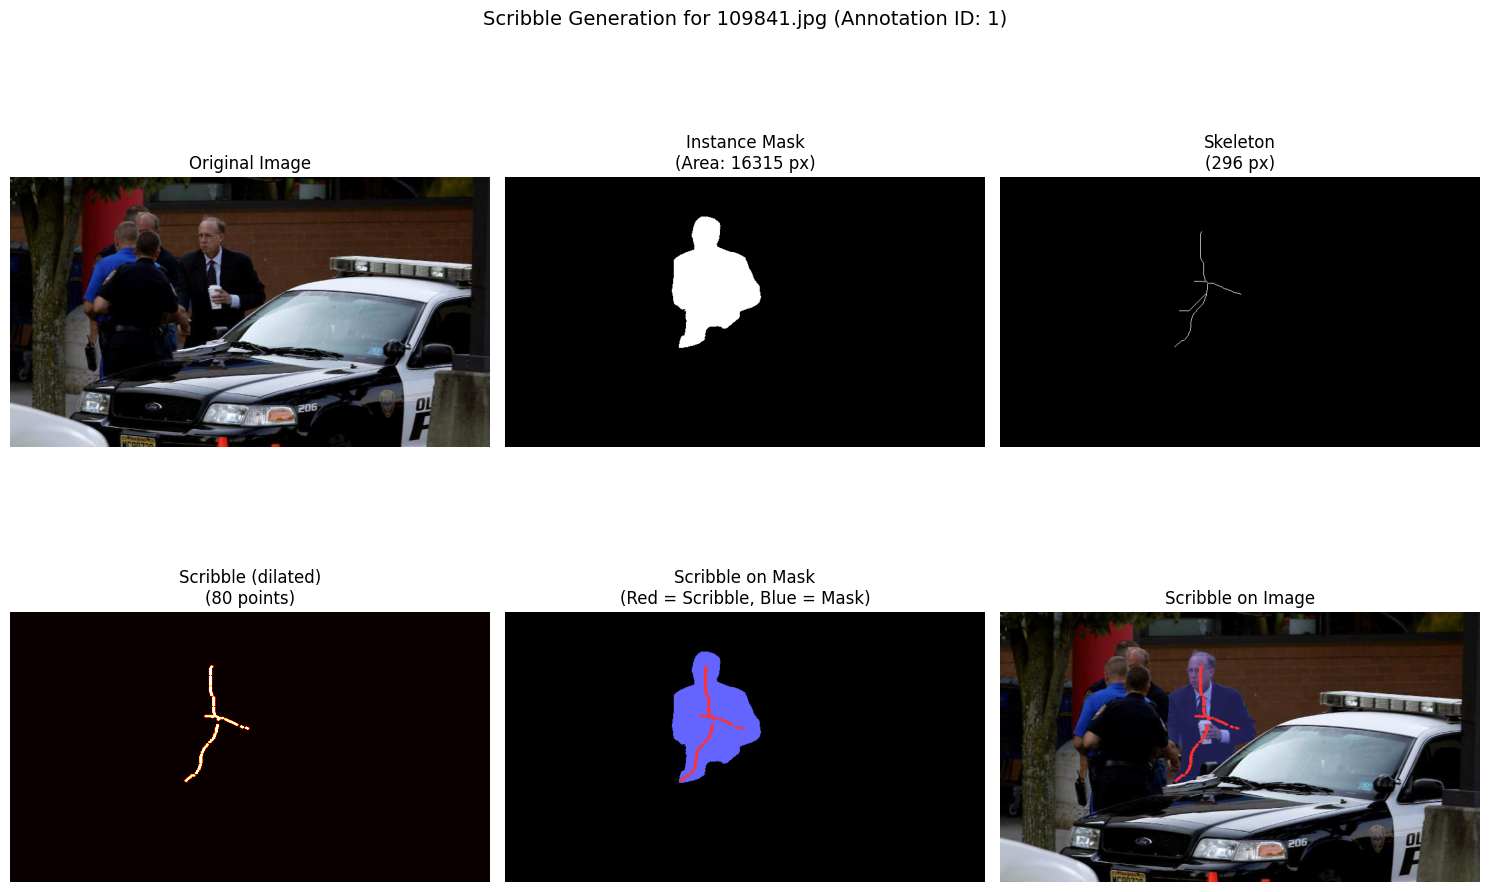


✓ Visualization complete!


In [11]:
# =====================================================
# VISUALIZE: Mask, Skeleton, and Scribble
# =====================================================
import matplotlib.pyplot as plt

# Create mask from segmentation
mask = polygon_to_mask(segmentation, height, width)

# Create skeleton
skeleton = extract_skeleton(mask)

# Create scribble visualization
scribble_mask = np.zeros((height, width), dtype=np.uint8)
for polyline in scribble:
    for i in range(0, len(polyline), 2):
        x, y = int(polyline[i]), int(polyline[i+1])
        if 0 <= x < width and 0 <= y < height:
            scribble_mask[y, x] = 255

# Dilate scribble for better visibility
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
scribble_dilated = cv2.dilate(scribble_mask, kernel, iterations=1)

# Load original image
img_path = folder / "images" / sample_img['file_name']
if img_path.exists():
    original_img = cv2.imread(str(img_path))
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
else:
    original_img = np.zeros((height, width, 3), dtype=np.uint8)
    print(f"⚠️ Image not found: {img_path}")

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Row 1
axes[0, 0].imshow(original_img)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(mask, cmap='gray')
axes[0, 1].set_title(f'Instance Mask\n(Area: {mask.sum()} px)')
axes[0, 1].axis('off')

axes[0, 2].imshow(skeleton, cmap='gray')
axes[0, 2].set_title(f'Skeleton\n({skeleton.sum()} px)')
axes[0, 2].axis('off')

# Row 2
axes[1, 0].imshow(scribble_dilated, cmap='hot')
axes[1, 0].set_title(f'Scribble (dilated)\n({len(scribble[0])//2} points)')
axes[1, 0].axis('off')

# Overlay on mask
overlay = np.zeros((height, width, 3), dtype=np.uint8)
overlay[mask > 0] = [100, 100, 255]  # Blue for mask
overlay[scribble_dilated > 0] = [255, 50, 50]  # Red for scribble
axes[1, 1].imshow(overlay)
axes[1, 1].set_title('Scribble on Mask\n(Red = Scribble, Blue = Mask)')
axes[1, 1].axis('off')

# Overlay on original image
overlay_img = original_img.copy()
overlay_img[mask > 0] = overlay_img[mask > 0] * 0.7 + np.array([100, 100, 255]) * 0.3
overlay_img[scribble_dilated > 0] = [255, 50, 50]
axes[1, 2].imshow(overlay_img.astype(np.uint8))
axes[1, 2].set_title('Scribble on Image')
axes[1, 2].axis('off')

plt.tight_layout()
plt.suptitle(f'Scribble Generation for {sample_img["file_name"]} (Annotation ID: {sample_ann["id"]})', 
             fontsize=14, y=1.02)
plt.show()

print(f"\n✓ Visualization complete!")

In [4]:
# =====================================================
# PROCESS BOTH TRAIN AND VAL JSON FILES
# Generate scribbles in correct format [5][24]
# =====================================================
# Format: 5 variations, 12 points each (24 coords per variation)
# Final shape when reshaped in training: (5, 12, 2)

print("=" * 70)
print("🚀 SCRIBBLE GENERATION FOR CROWDPOSE DATASET")
print("   Format: [5][24] (5 variations × 12 points × 2 coords)")
print("=" * 70)

# Process training set
print("\n" + "=" * 70)
print("Processing RefHuman_train.json...")
print("=" * 70)

train_stats = process_json_file_5x24(
    input_path="CrowdPose_HumarProcessed/RefHuman_train.json",
    output_path="CrowdPose_HumarProcessed/RefHuman_train.json",  # Overwrite in place
    num_variations=5,
    num_points=12
)

# Process validation set
print("\n" + "=" * 70)
print("Processing RefHuman_val.json...")
print("=" * 70)

val_stats = process_json_file_5x24(
    input_path="CrowdPose_HumarProcessed/RefHuman_val.json",
    output_path="CrowdPose_HumarProcessed/RefHuman_val.json",  # Overwrite in place
    num_variations=5,
    num_points=12
)

print("\n" + "=" * 70)
print("🎉 SCRIBBLE GENERATION COMPLETE!")
print("=" * 70)
print(f"\nTrain: {train_stats['successful']}/{train_stats['total_annotations']} successful")
print(f"Val: {val_stats['successful']}/{val_stats['total_annotations']} successful")
print(f"\nScribble format: [5][24] = 5 variations × 24 coords (12 points × 2)")
print("Ready for training with refhuman.py expected format (5, 12, 2)!")

🚀 SCRIBBLE GENERATION FOR CROWDPOSE DATASET
   Format: [5][24] (5 variations × 12 points × 2 coords)

Processing RefHuman_train.json...
Loading CrowdPose_HumarProcessed/RefHuman_train.json...
Processing 120501 annotations...
Processing 120501 annotations...


Generating scribbles: 100%|██████████| 120501/120501 [29:10<00:00, 68.85it/s] 



Saving to CrowdPose_HumarProcessed/RefHuman_train.json...

✅ Complete! 120501/120501 successful

Processing RefHuman_val.json...
Loading CrowdPose_HumarProcessed/RefHuman_val.json...
Processing 30428 annotations...

✅ Complete! 120501/120501 successful

Processing RefHuman_val.json...
Loading CrowdPose_HumarProcessed/RefHuman_val.json...
Processing 30428 annotations...


Generating scribbles: 100%|██████████| 30428/30428 [07:48<00:00, 64.91it/s] 



Saving to CrowdPose_HumarProcessed/RefHuman_val.json...

✅ Complete! 30428/30428 successful

🎉 SCRIBBLE GENERATION COMPLETE!

Train: 120501/120501 successful
Val: 30428/30428 successful

Scribble format: [5][24] = 5 variations × 24 coords (12 points × 2)
Ready for training with refhuman.py expected format (5, 12, 2)!

✅ Complete! 30428/30428 successful

🎉 SCRIBBLE GENERATION COMPLETE!

Train: 120501/120501 successful
Val: 30428/30428 successful

Scribble format: [5][24] = 5 variations × 24 coords (12 points × 2)
Ready for training with refhuman.py expected format (5, 12, 2)!


Total annotations with scribbles: 120501


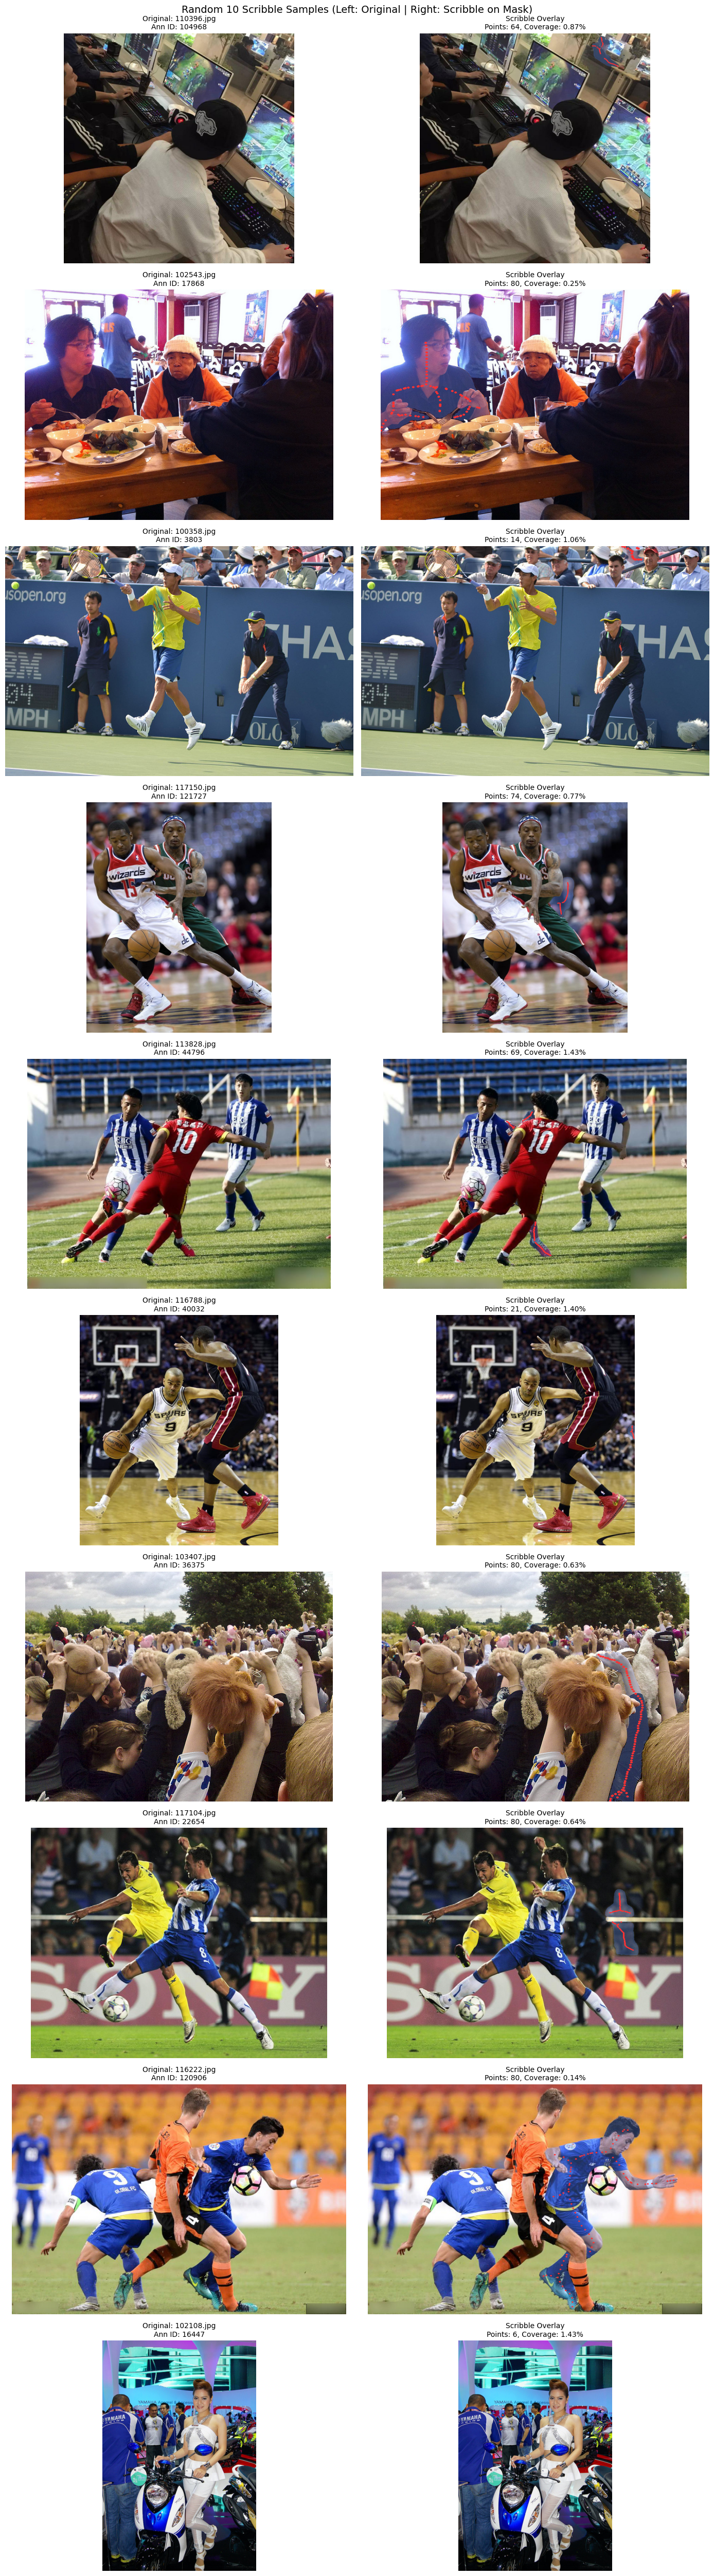


✅ Visualization complete! Scribbles are shown in RED overlaid on the instance masks (light blue).


In [ ]:
# =====================================================
# VISUALIZE 10 RANDOM SCRIBBLE SAMPLES
# New format: [5][24] - showing variation 0 (clean)
# =====================================================
import json
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from pathlib import Path

# Load the updated JSON with scribbles
folder = Path("CrowdPose_HumarProcessed")
with open(folder / "RefHuman_train.json", "r") as f:
    train_with_scribbles = json.load(f)

# Build image lookup
img_lookup = {img['id']: img for img in train_with_scribbles['images']}

# Filter annotations that have non-empty scribbles in correct format
annotations_with_scribbles = []
for ann in train_with_scribbles['annotations']:
    scribble = ann.get('scribble', [])
    # Check if it's the new [5][24] format
    if isinstance(scribble, list) and len(scribble) == 5:
        if all(isinstance(v, list) and len(v) == 24 for v in scribble):
            annotations_with_scribbles.append(ann)

print(f"Total annotations with correct [5][24] scribble format: {len(annotations_with_scribbles)}")

# Verify format of first annotation
if annotations_with_scribbles:
    sample = annotations_with_scribbles[0]['scribble']
    print(f"Sample scribble shape: [{len(sample)}][{len(sample[0])}]")
    print(f"Can reshape to (5, 12, 2): {np.array(sample).reshape(5, 12, 2).shape}")

# Randomly select 10 samples
random.seed(42)
samples = random.sample(annotations_with_scribbles, min(10, len(annotations_with_scribbles)))

# Create visualization grid: 10 rows x 2 columns
fig, axes = plt.subplots(10, 2, figsize=(14, 50))

for idx, ann in enumerate(samples):
    img_info = img_lookup.get(ann['image_id'], {})
    height = img_info.get('height', 480)
    width = img_info.get('width', 640)
    file_name = img_info.get('file_name', 'unknown.jpg')
    
    # Load original image
    img_path = folder / "images" / file_name
    if img_path.exists():
        original_img = cv2.imread(str(img_path))
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    else:
        original_img = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Create mask from segmentation
    segmentation = ann.get('segmentation', [])
    mask = np.zeros((height, width), dtype=np.uint8)
    for polygon in segmentation:
        if len(polygon) >= 6:
            pts = np.array(polygon).reshape(-1, 2).astype(np.int32)
            cv2.fillPoly(mask, [pts.reshape((-1, 1, 2))], 1)
    
    # Create scribble visualization from new [5][24] format
    # Use variation 0 (the clean base scribble)
    scribble_5x24 = ann.get('scribble', [])
    scribble_mask = np.zeros((height, width), dtype=np.uint8)
    
    if len(scribble_5x24) >= 1:
        # Take first variation (clean)
        coords = scribble_5x24[0]  # 24 values = 12 points
        for i in range(0, len(coords), 2):
            x, y = int(coords[i]), int(coords[i+1])
            if 0 <= x < width and 0 <= y < height:
                scribble_mask[y, x] = 255
    
    # Dilate scribble for visibility
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    scribble_dilated = cv2.dilate(scribble_mask, kernel, iterations=1)
    
    # Create overlay image
    overlay_img = original_img.copy()
    # Light blue tint for mask region
    overlay_img[mask > 0] = (overlay_img[mask > 0] * 0.7 + np.array([100, 150, 255]) * 0.3).astype(np.uint8)
    # Red for scribble
    overlay_img[scribble_dilated > 0] = [255, 50, 50]
    
    # Calculate scribble stats
    num_points = 12  # Fixed in new format
    coverage = (num_points / mask.sum() * 100) if mask.sum() > 0 else 0
    
    # Plot original image (left)
    axes[idx, 0].imshow(original_img)
    axes[idx, 0].set_title(f'Original: {file_name}\nAnn ID: {ann["id"]}', fontsize=10)
    axes[idx, 0].axis('off')
    
    # Plot overlay (right)
    axes[idx, 1].imshow(overlay_img)
    axes[idx, 1].set_title(f'Scribble (12 points, var 0)\nFormat: [5][24] ✓', fontsize=10)
    axes[idx, 1].axis('off')

plt.tight_layout()
plt.suptitle('Random 10 Scribbles - New Format [5][24] (Left: Original | Right: Scribble on Mask)', 
             fontsize=14, y=1.001)
plt.show()

print("\n✅ Visualization complete!")
print("Scribble format: [5][24] = 5 variations × 12 points × 2 coords")
print("This matches the expected format in refhuman.py: reshape(5, 12, 2)")